In [1]:
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs("figs/", exist_ok=True)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math font

In [2]:
config_table = pd.read_csv("results-bandwidth/setting-table.csv", index_col=0)
assert len(config_table) == 288 + 1

mean_vals = pd.read_csv("results-bandwidth/mean_vals.csv")
OPTUNA_INDEX = config_table[config_table.alpha.isna()].index.tolist()
optuna_vals = mean_vals[np.any([mean_vals.setting_index == idx for idx in OPTUNA_INDEX], axis=0)]
mean_vals = mean_vals[np.all([mean_vals.setting_index != idx for idx in OPTUNA_INDEX], axis=0)]

target_names = mean_vals.target.unique()
target_cols = mean_vals.target
target_names

array(['Perm_10d', 'Schwefel_05d', 'Rosenbrock_10d', 'Rastrigin_30d',
       'KTablet_10d', 'Sphere_05d', 'Rosenbrock_30d',
       'WeightedSphere_10d', 'WeightedSphere_30d', 'cifar10',
       'Styblinski_10d', 'Ackley_30d', 'parkinsons_telemonitoring',
       'Levy_30d', 'XinSheYang_30d', 'Sphere_10d', 'Griewank_05d',
       'Ackley_10d', 'car', 'Levy_05d', 'Sphere_30d', 'segment',
       'Griewank_10d', 'naval_propulsion', 'KTablet_05d', 'phoneme',
       'Styblinski_30d', 'Rosenbrock_05d', 'Schwefel_30d', 'Perm_30d',
       'XinSheYang_05d', 'credit_g', 'XinSheYang_10d', 'fashion_mnist',
       'australian', 'Rastrigin_05d', 'blood_transfusion', 'Perm_05d',
       'Rastrigin_10d', 'WeightedSphere_05d', 'Ackley_05d', 'vehicle',
       'kc1', 'colorectal_histology', 'KTablet_30d', 'Griewank_30d',
       'Schwefel_10d', 'Levy_10d', 'Styblinski_05d', 'slice_localization',
       'protein_structure'], dtype=object)

In [3]:
config_table = config_table[
    (config_table.multivariate == True)
    & (config_table.alpha == 1.0)
    & (config_table.weight == "older-smaller")
]

In [4]:
rec_vals = {
    "magic-clip": True,
    "min_bandwidth_factor": 0.01,
    "heuristic": "scott",
}

mask = np.ones(len(config_table), dtype=np.bool8)
for k, v in rec_vals.items():
    mask &= (config_table[k] == v)

recommended_setting_results = mean_vals[mean_vals["setting_index"] == config_table[mask].index[0]]
recommended_setting_results.head(10)

setting_index              target     n_evals001     n_evals002  \
12444            244            Perm_10d    1241.205300     837.171800   
12445            244        Schwefel_05d    -164.090160    -238.209550   
12446            244      Rosenbrock_10d  133702.750000  103194.445000   
12447            244       Rastrigin_30d     536.319900     504.728270   
12448            244         KTablet_10d  506546.300000  454820.030000   
12449            244          Sphere_05d      42.867767      24.851173   
12450            244      Rosenbrock_30d  411573.800000  315497.900000   
12451            244  WeightedSphere_10d     375.418370     337.641500   
12452            244  WeightedSphere_30d    4097.425300    3284.788300   
12453            244             cifar10      28.923738      17.543901   

          n_evals003     n_evals004     n_evals005     n_evals006  \
12444     578.951300     380.117100     376.074300     342.330780   
12445    -395.460420    -543.112730    -543.112730    -596.721400   
12446   87042.766000   69044.970000   58985.900000   57357.473000   
12447     475.891750     470.693150     467.816860     463.631930   
12448  432131.700000  386422.030000  366056.400000  359606.970000   
12449      23.634754      21.118855      20.747738      18.992445   
12450  271465.440000  259475.400000  250960.300000  250960.300000   
12451     316.264300     285.383820     270.530120     269.005000   
12452    2932.158200    2866.491200    2866.491200    2703.949000   
12453      15.906519      15.141233      14.790152      14.692209   

          n_evals007     n_evals008  ...    n_evals191    n_evals192  \
12444     271.188050     252.204200  ...     11.410031     11.410031   
12445    -631.004940    -660.139600  ...  -1458.231400  -1458.231400   
12446   57071.477000   47509.550000  ...    544.062400    544.062400   
12447     463.631930     463.631930  ...    302.638240    302.638240   
12448  357915.780000  328892.880000  ...  16393.094000  16077.435000   
12449      16.790731      13.688842  ...      0.205942      0.205942   
12450  250960.300000  250960.300000  ...  17152.945000  17152.945000   
12451     268.109000     240.586850  ...     18.881107     17.518538   
12452    2703.949000    2703.949000  ...    477.438300    477.438300   
12453      14.439924      13.664784  ...      8.402537      8.402537   

         n_evals193    n_evals194    n_evals195    n_evals196    n_evals197  \
12444     11.410031     11.410031     11.410031     11.410031     11.410031   
12445  -1458.231400  -1458.231400  -1458.231400  -1458.231400  -1458.231400   
12446    544.062400    544.062400    544.062400    544.062400    544.062400   
12447    302.638240    302.638240    302.638240    302.638240    302.638240   
12448  16077.435000  15035.268000  14739.360000  14739.360000  14739.360000   
12449      0.205942      0.205942      0.205942      0.205942      0.205942   
12450  17152.945000  17152.945000  17127.734000  16886.459000  16886.459000   
12451     17.518538     17.518538     16.703478     16.703478     16.703478   
12452    477.438300    477.438300    466.219020    461.026820    461.026820   
12453      8.402537      8.402537      8.402537      8.402537      8.402537   

         n_evals198    n_evals199    n_evals200  
12444     11.410031     10.662237     10.662237  
12445  -1458.231400  -1458.231400  -1493.459100  
12446    531.246800    531.246800    531.246800  
12447    302.638240    302.638240    302.638240  
12448  14739.360000  14739.360000  14739.360000  
12449      0.205942      0.205942      0.205942  
12450  16546.830000  16546.830000  16546.830000  
12451     16.703478     16.703478     16.703478  
12452    461.026820    460.361050    460.361050  
12453      8.402537      8.402537      8.402537  

[10 rows x 202 columns]

In [5]:
def add_optuna_legend(ax: plt.Axes, bbox_to_anchor):
    lines = [
        ax.plot([-1, -1], [-1, -1], color="brown", linestyle="dashed", lw=3)[0],
        # ax.plot([-1, -1], [-1, -1], color="black", linestyle="dotted", lw=3)[0]
    ]
    # labels = ["Optuna v3.1.0", "Recommended"]
    labels = ["Optuna v3.1.0"]
    ax.legend(
        handles=lines,
        loc="upper center",
        labels=labels,
        bbox_to_anchor=bbox_to_anchor,  # ここは調整が必要です
        fancybox=False,
        shadow=False,
        ncol=len(labels),
        fontsize=48,
    )

In [6]:
HEURISTIC_CONDS = (
    config_table.heuristic == "scott",
    config_table.heuristic == "hyperopt",
    config_table.heuristic == "optuna",
)
HEURISTIC_LABELS = ("Scott", "Hyperopt", "Optuna")
HEURISTIC_TITLE = "Bandwidth Heuristic"

MAGIC_CLIP_CONDS = (config_table["magic-clip"] == True, config_table["magic-clip"] == False)
MAGIC_CLIP_LABELS = ("With", "Without")
MAGIC_CLIP_TITLE = "Magic clipping"

BW_CONDS = (
    (config_table["min_bandwidth_factor"] == 0.01),
    (config_table["min_bandwidth_factor"] == 0.03),
    (config_table["min_bandwidth_factor"] == 0.1),
    (config_table["min_bandwidth_factor"] == 0.3),
)
BW_LABELS= ("0.01", "0.03", "0.1", "0.3")
BW_TITLE = "$b_{\min}$"

COLORS2 = ("red", "blue")
COLORS3 = ("red", "blue", "cyan")
COLORS4 = ("red", "lime", "cyan", "blue")

In [7]:
from typing import Optional, Tuple
from parzen_estimator import NumericalParzenEstimator


def plot_pdp(
    ax: plt.Axes,
    target_name: str,
    masks: Tuple[np.ndarray],
    colors: Tuple[str],
    title: Optional[str],
    labels: Optional[Tuple[str]],
):
    target_mean = mean_vals[target_cols == target_name]
    optuna_means = optuna_vals[optuna_vals.target == target_name]
    X = np.arange(200) + 1
    alpha = 0.2
    lw_weak, lw = 1, 3
    ymin = min(target_mean["n_evals200"].min(), optuna_means["n_evals200"].min()) - 1e-12
    ymax = max(target_mean["n_evals010"].max(), optuna_means["n_evals010"].max()) + 1e-12

    checkpoints = [50, 100, 150, 200]
    buffer = 0
    labels = labels if labels is not None else [None for _ in range(len(colors))]
    for color, mask, label in zip(colors, masks, labels):
        pdp = np.zeros(200)
        cnt = 0
        ys = {p: [] for p in checkpoints}
        for idx in config_table[mask].index:
            try:
                m = target_mean[target_mean.setting_index == idx].iloc[0].to_numpy()[2:].astype(np.float32)
                # ax.scatter(X[::25], m[::25], alpha=alpha, color=color, s=3)
                for p in checkpoints:
                    ys[p].append(m[p - 1])

                pdp += m
                cnt += 1
            except IndexError:
                pass
        else:
            pdp /= cnt
            ax.plot(X, pdp, color=color, lw=lw, label=label)
            dy = np.linspace(ymin, ymax, 100)
            R = ymax - ymin
            pdf_vals = {
                p: NumericalParzenEstimator(samples=np.asarray(ys[p]), lb=ymin-R, ub=ymax+R, prior=False)(dy)
                for p in checkpoints
            }
            height = 1
            for p in checkpoints:
                pdf_val = pdf_vals[p]
                # 1 / (ymax - ymin) ==> 5
                # 5 * (ymax - ymin)
                S = height * (ymax - ymin)
                ax.fill_betweenx(dy, p - pdf_val * S - buffer, p - buffer, color=color, alpha=alpha)
            else:
                buffer += 6

    # Optuna plot
    m = optuna_means.iloc[0].to_numpy()[2:]
    ax.plot(X, m, color="brown", linestyle="dashed", lw=lw)
    try:
        # recommended
        # m = recommended_setting_results[recommended_setting_results.target == target_name].iloc[0].to_numpy()[2:].astype(np.float32)
        # ax.plot(X, m, color="black", linestyle="dotted", lw=lw)
        print("pass recommendation")
    except:
        pass

    if title is not None:
        ax.set_title(title, fontsize=48)
    if labels[0] is not None:
        ax.legend(loc="upper right")

    ax.set_xlim(1, 200)
    ax.set_ylim(ymin, ymax)
    ax.grid()


def plot_multiple_pdps(
    axes: Tuple[plt.Axes],
    target_name: str,
    set_title: bool,
    set_label: bool,
):
    for ax, masks, colors, labels, title in zip(
        axes,
        [MAGIC_CLIP_CONDS, HEURISTIC_CONDS, BW_CONDS],
        [COLORS2, COLORS3, COLORS4],
        [MAGIC_CLIP_LABELS, HEURISTIC_LABELS, BW_LABELS],
        [MAGIC_CLIP_TITLE, HEURISTIC_TITLE, BW_TITLE],
    ):  # TODO: from here
        title = title if set_title else None
        labels = labels if set_label else None
        plot_pdp(ax=ax, target_name=target_name, masks=masks, colors=colors, title=title, labels=labels)

## Benchmark functions

['Levy', 'Griewank', 'Perm', 'XinSheYang', 'Rosenbrock', 'Styblinski', 'Rastrigin', 'Sphere', 'KTablet', 'Ackley', 'Schwefel', 'WeightedSphere']
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommenda

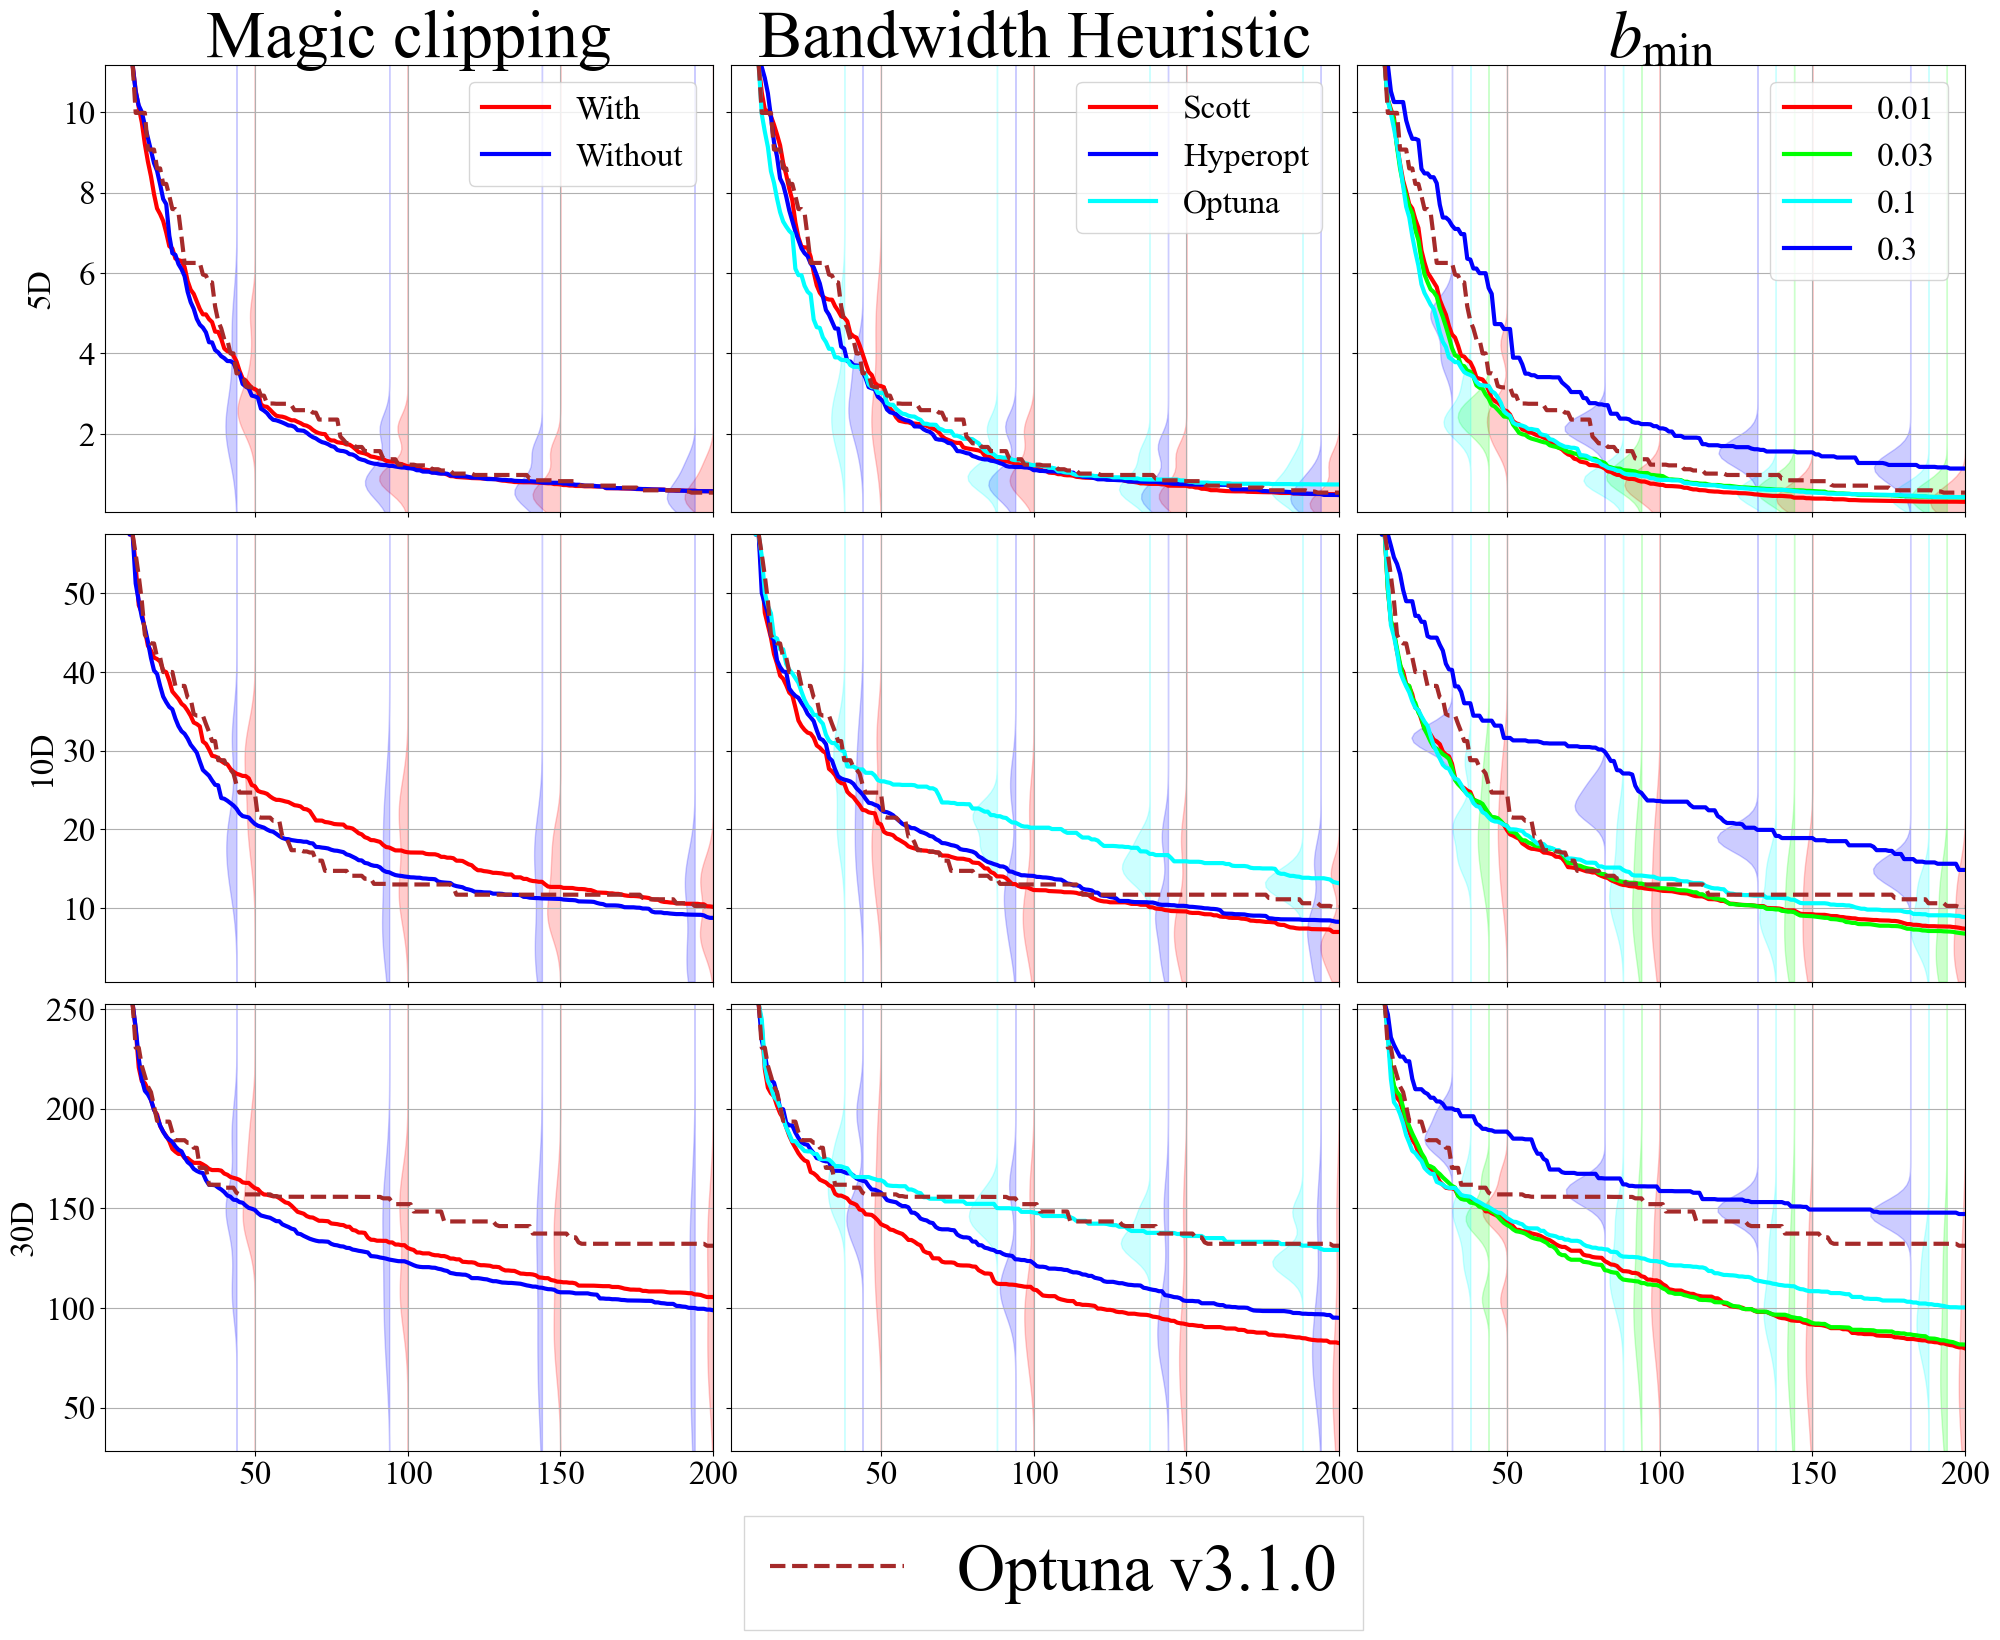

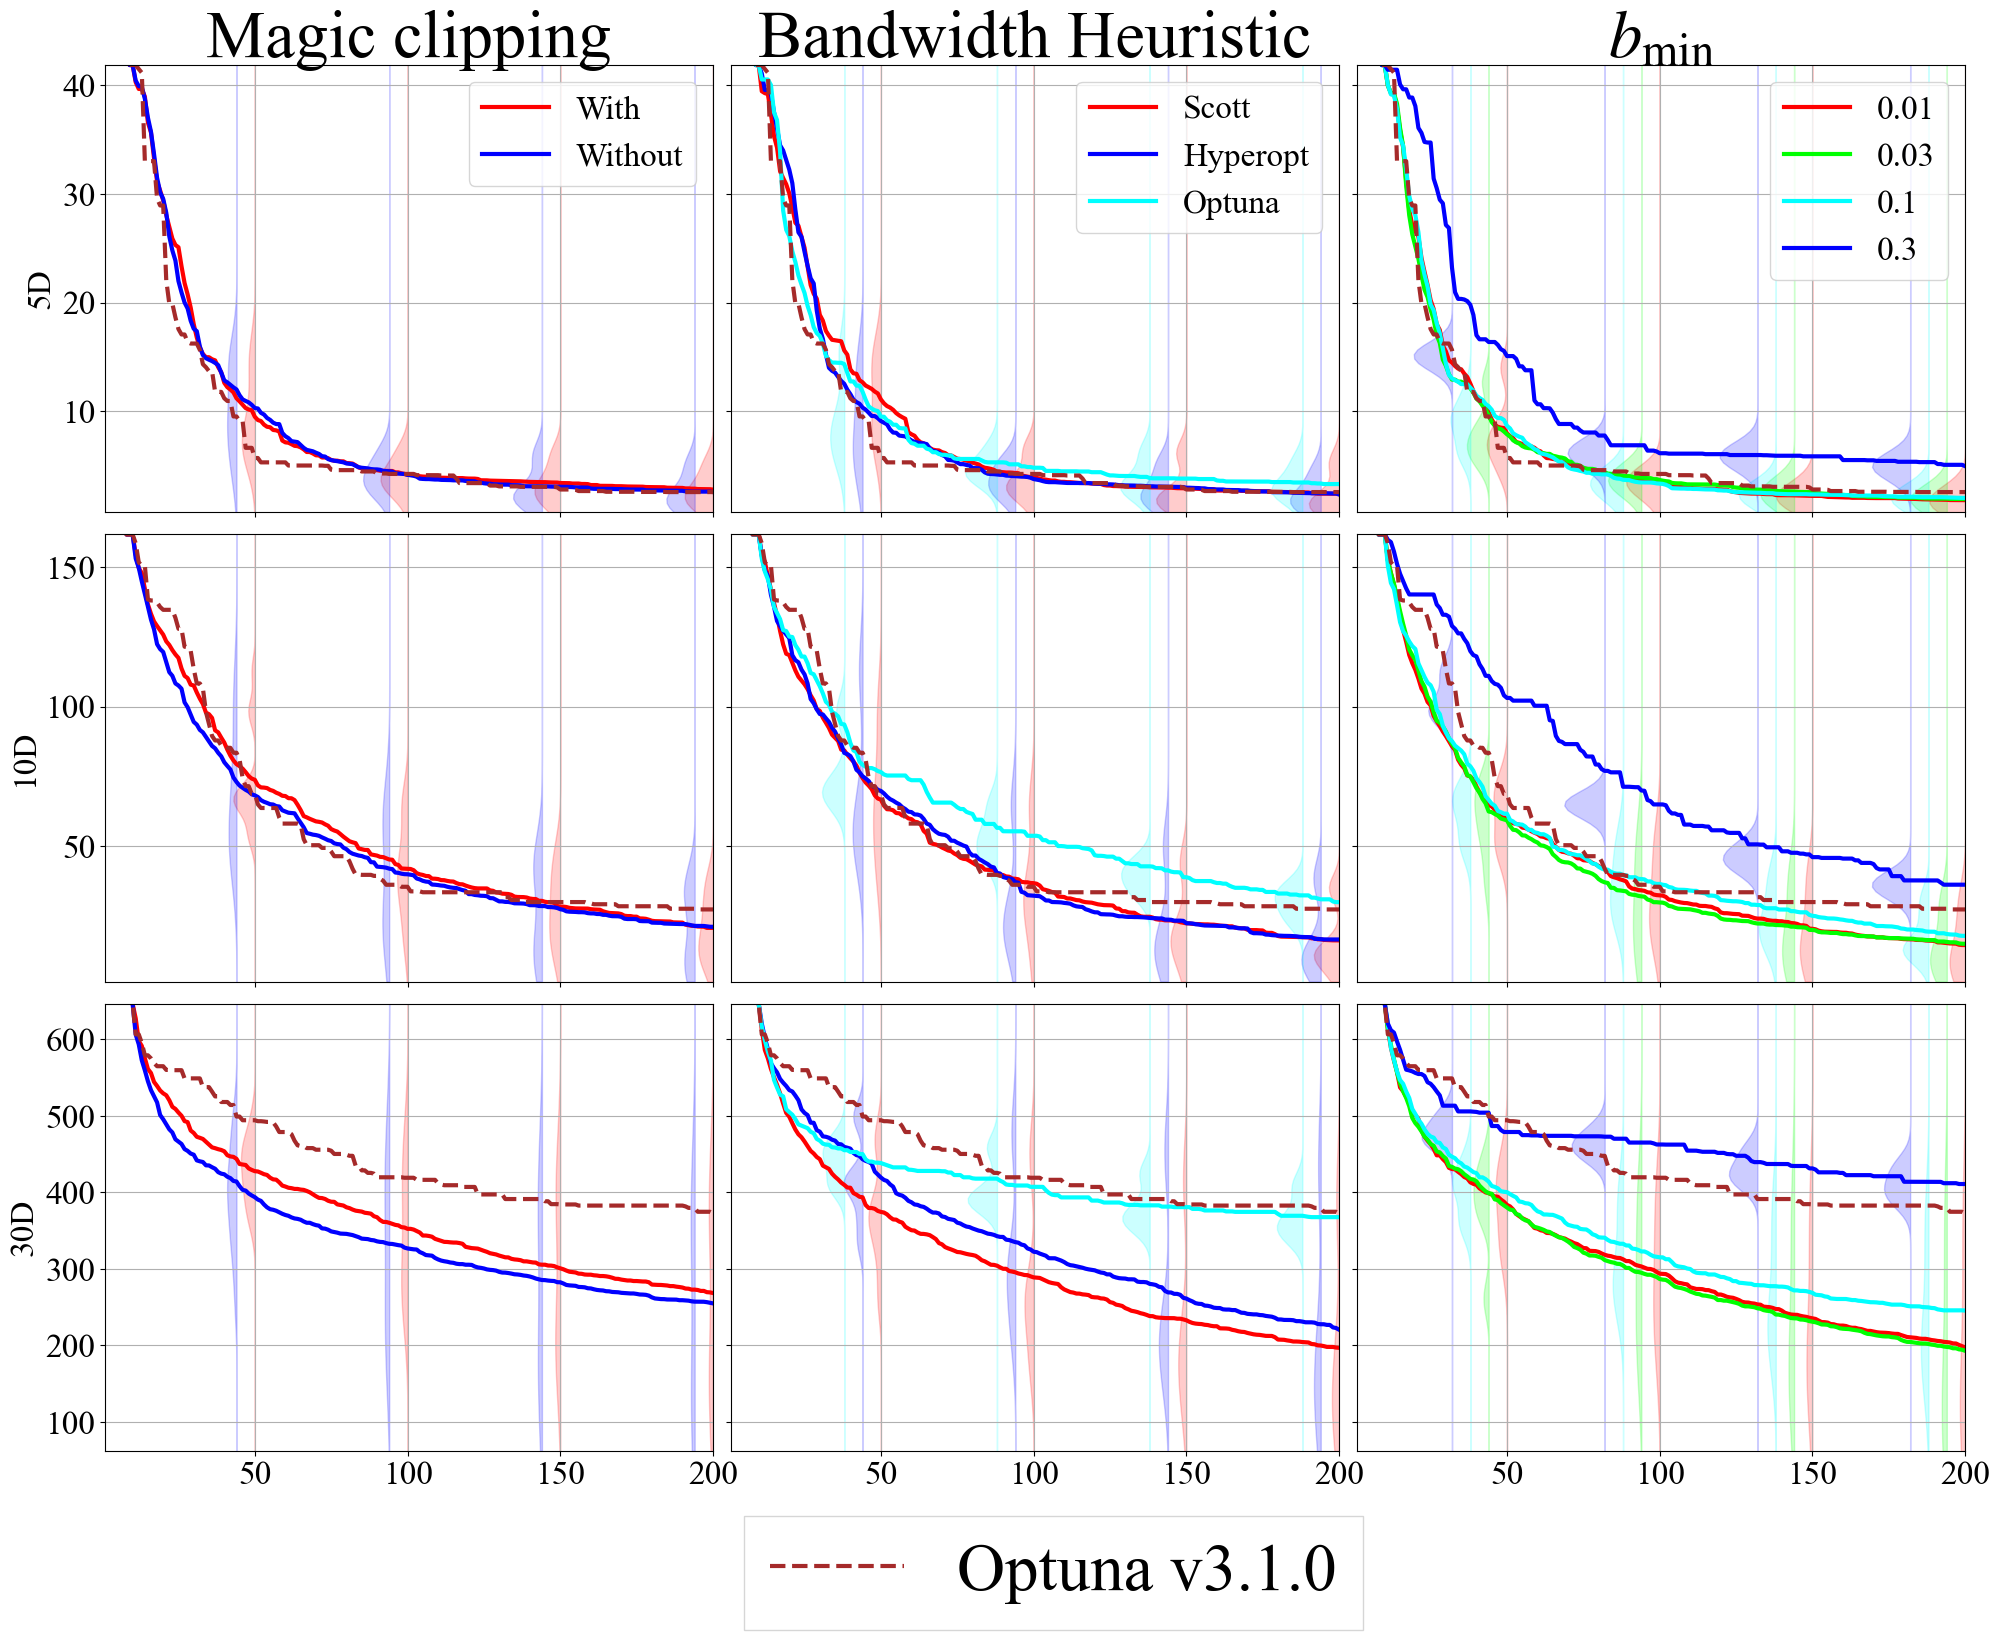

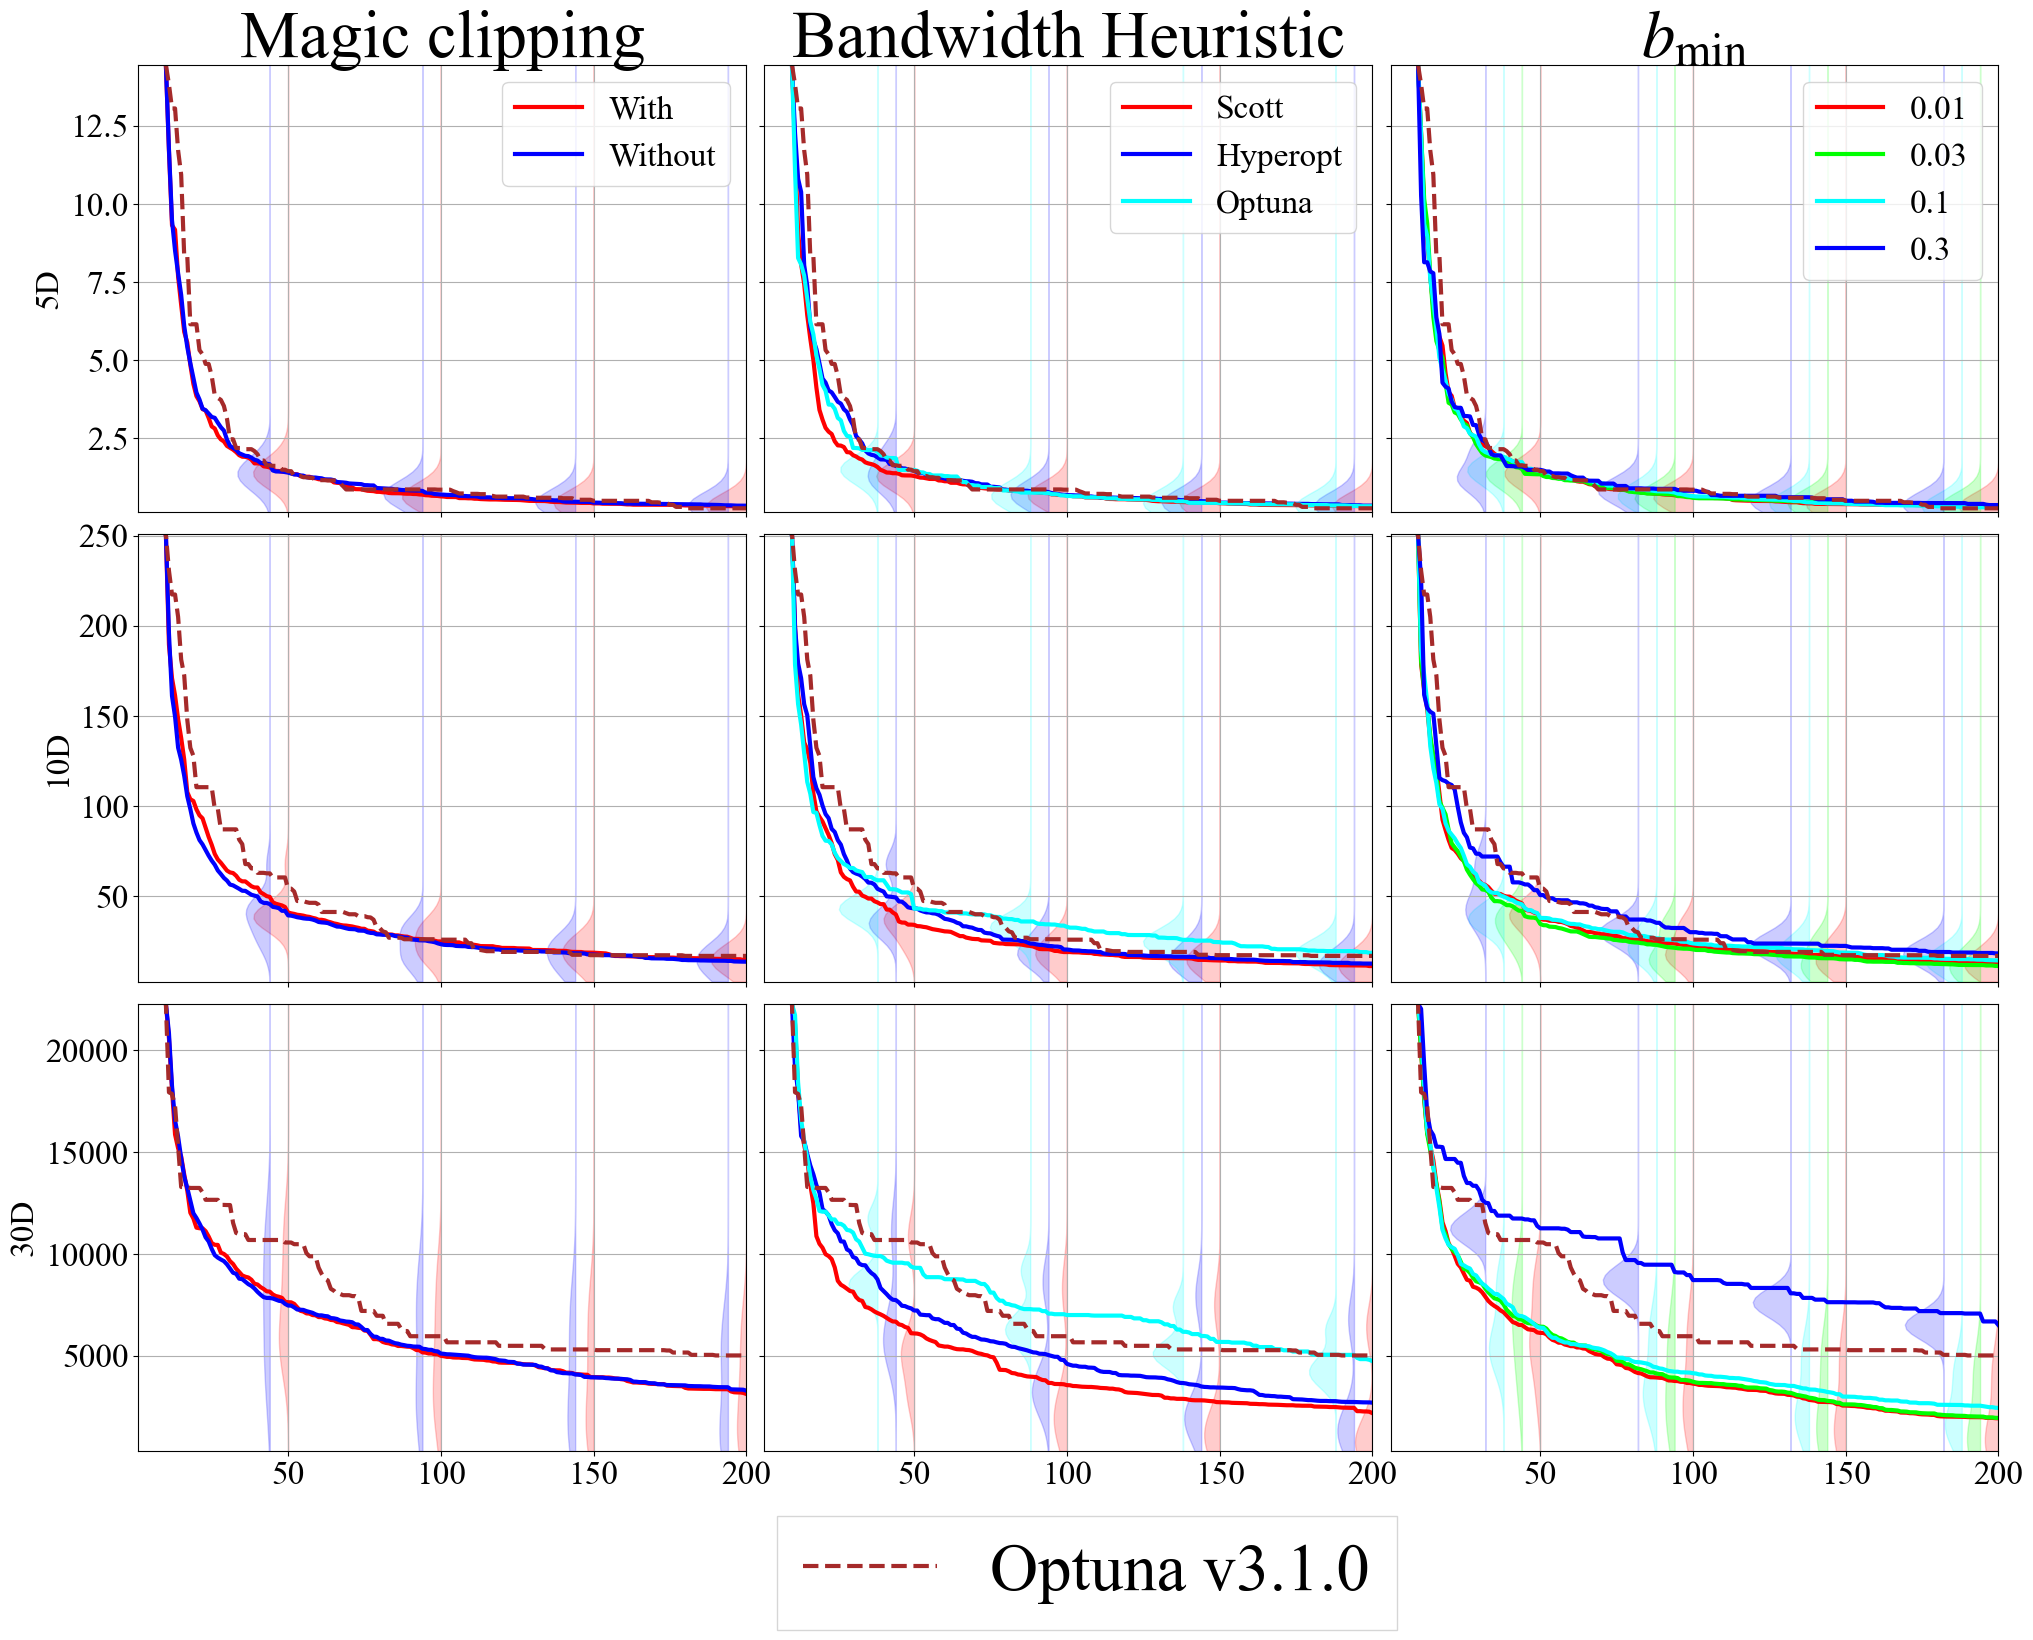

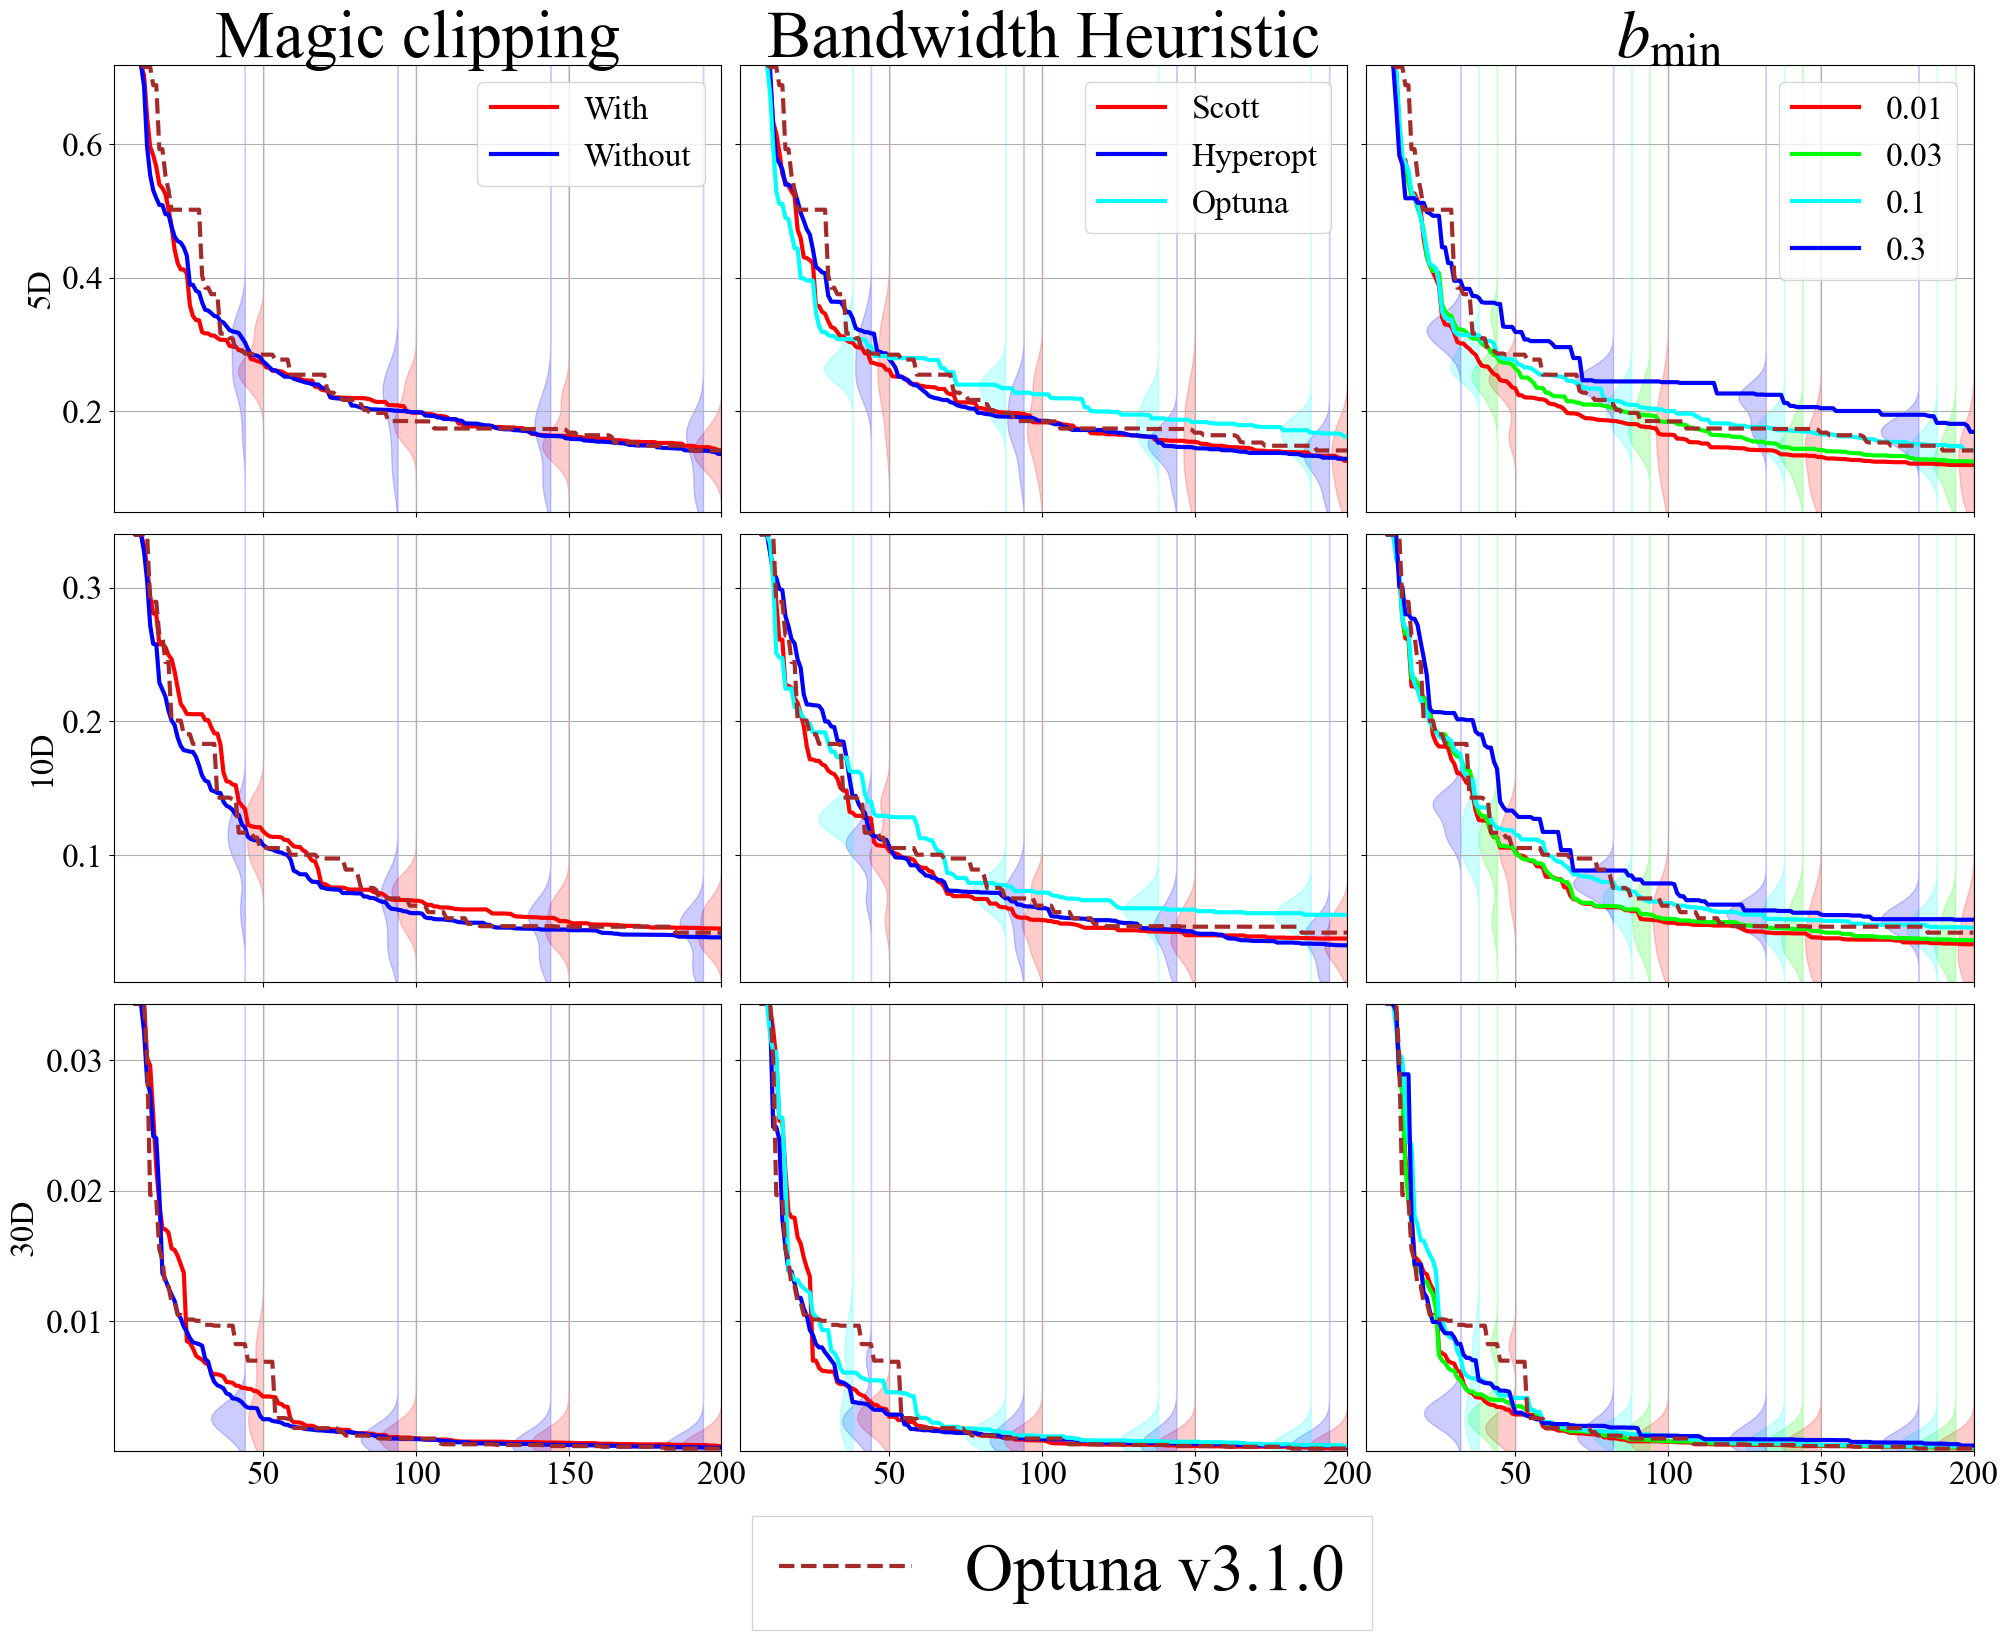

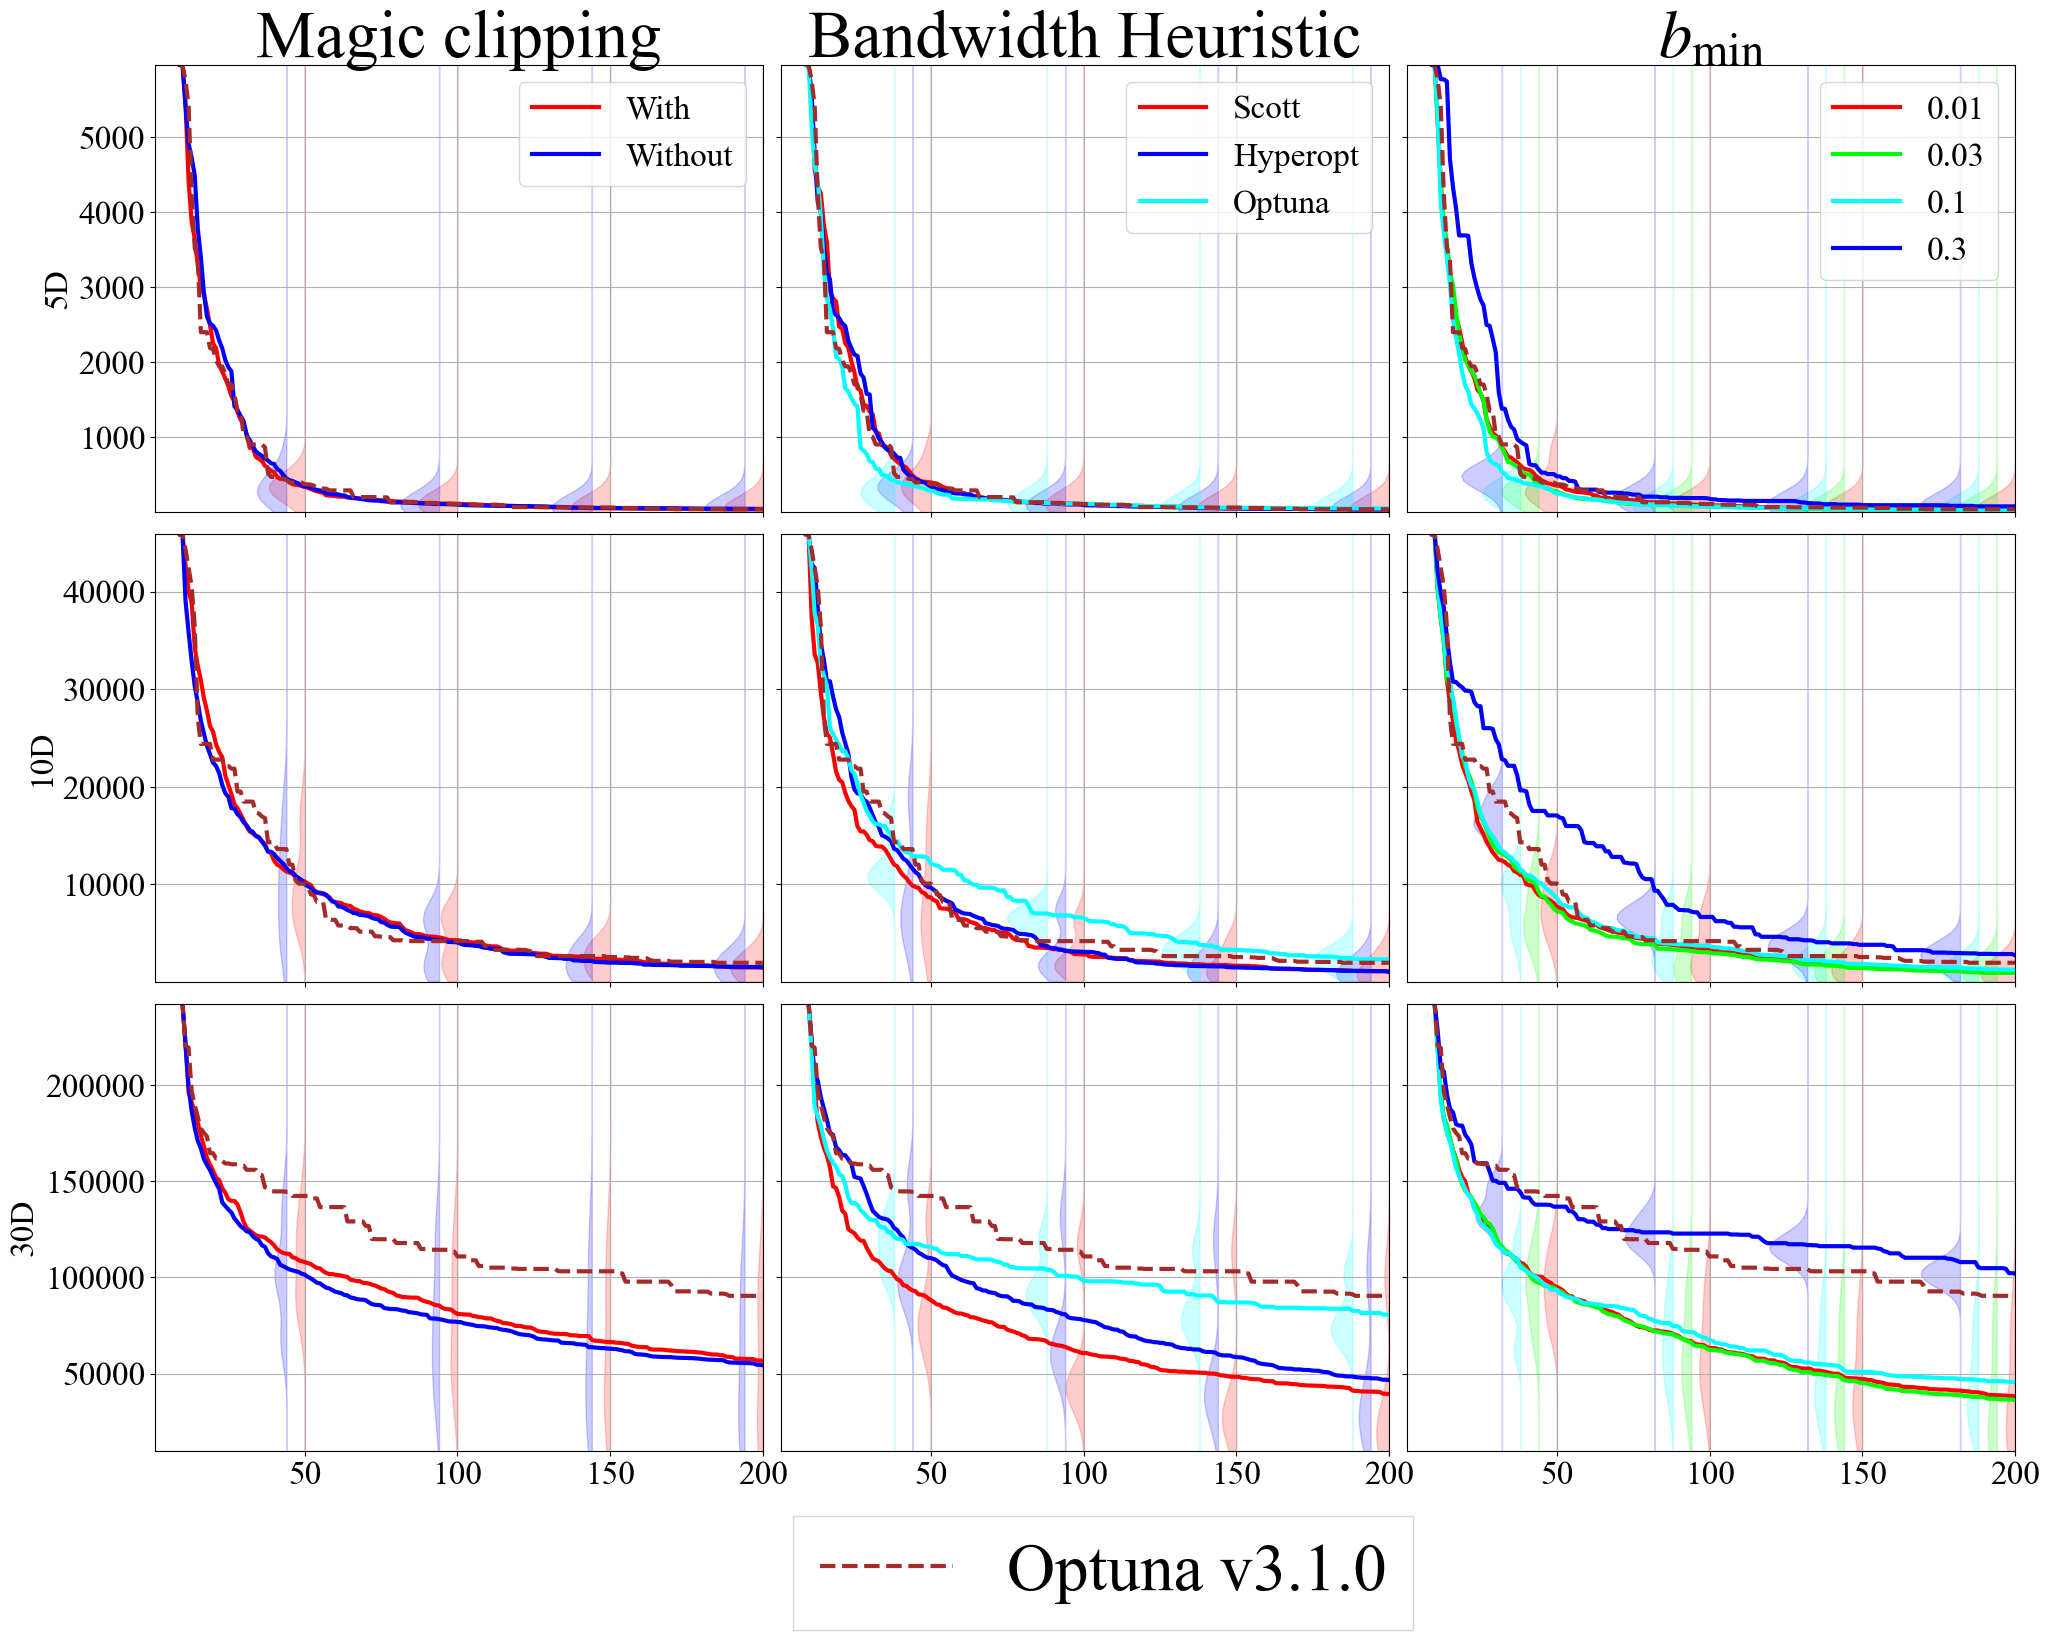

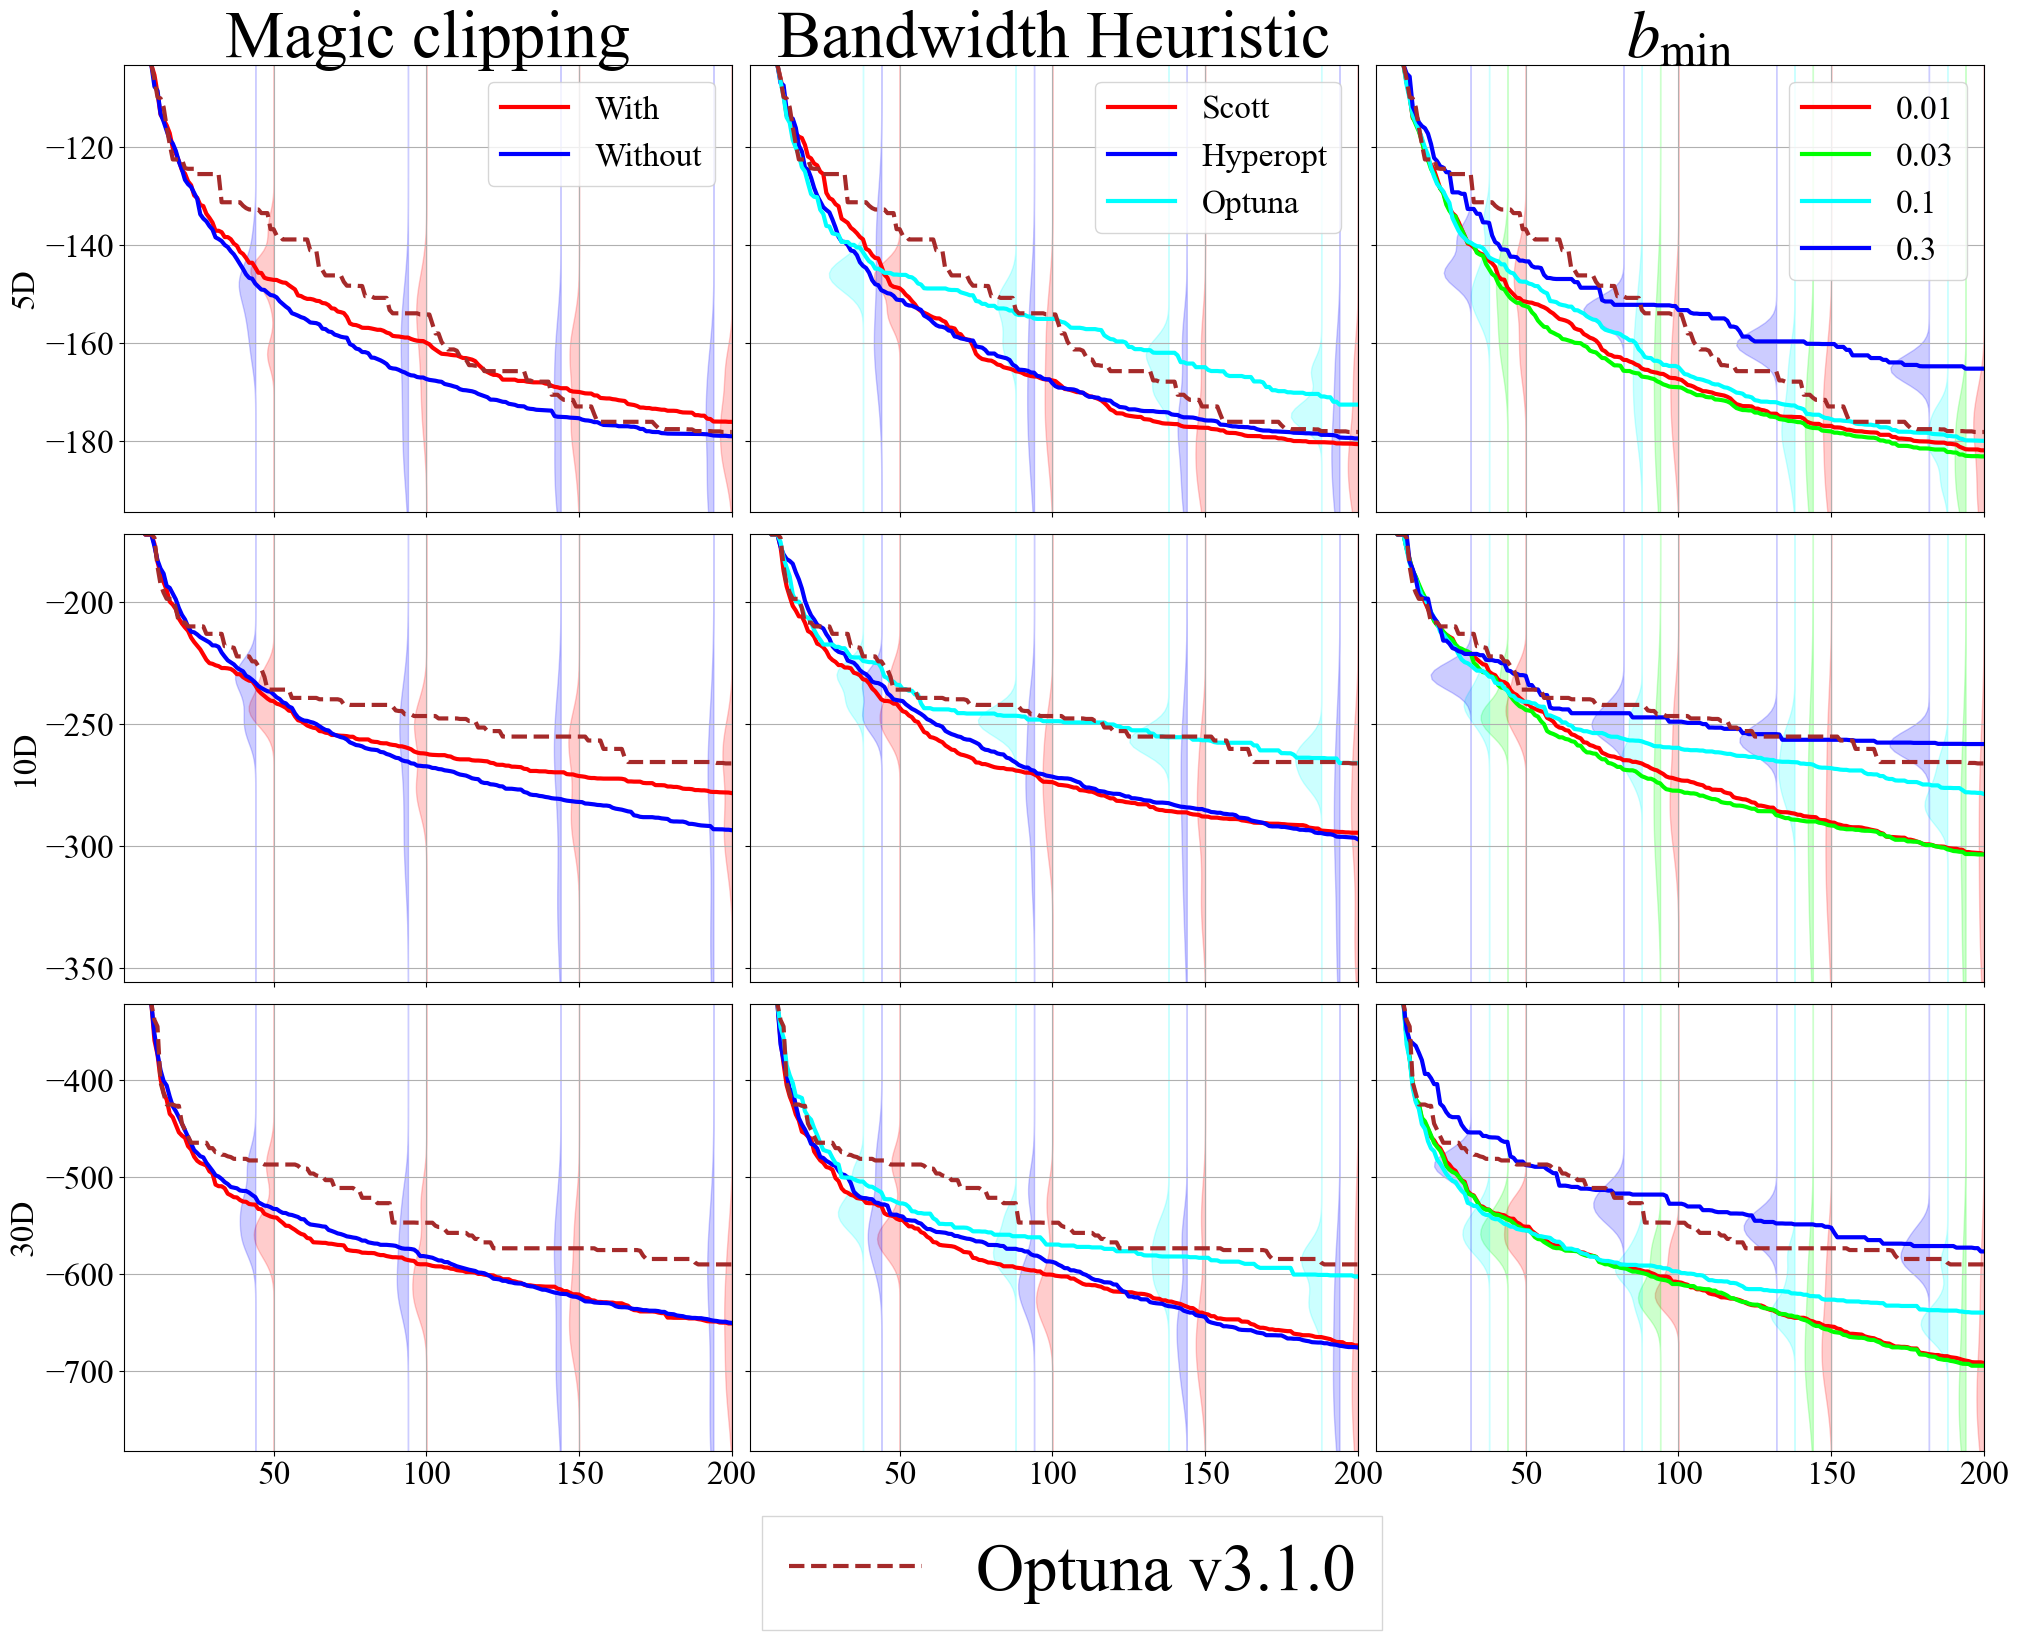

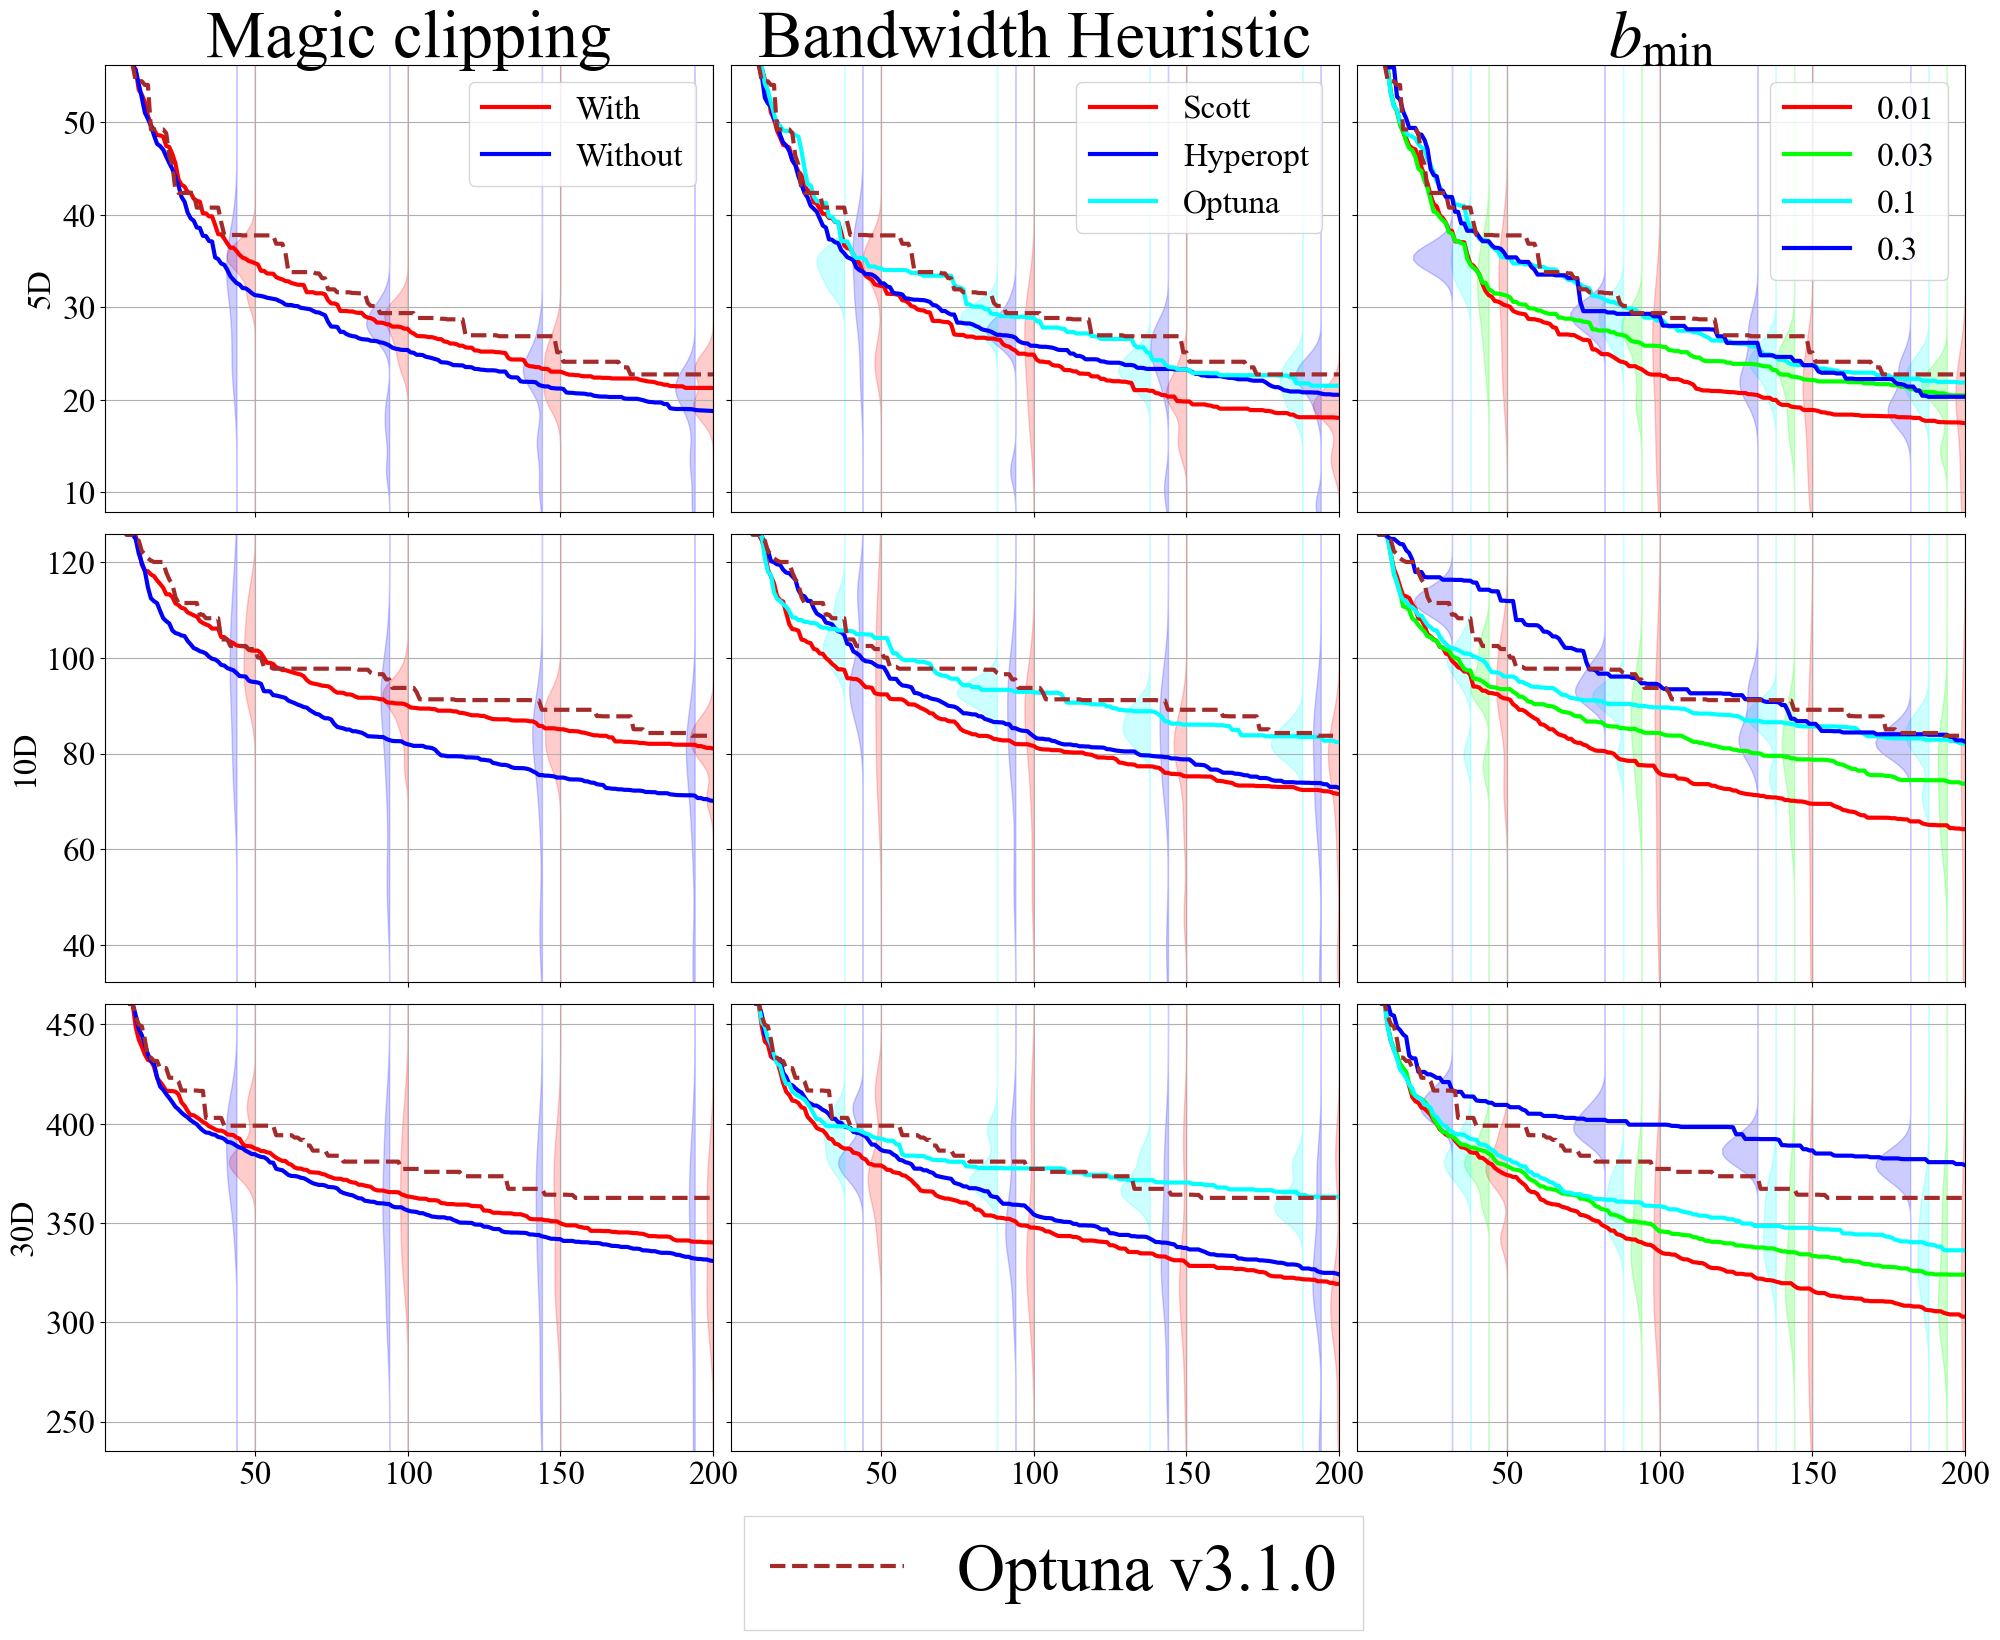

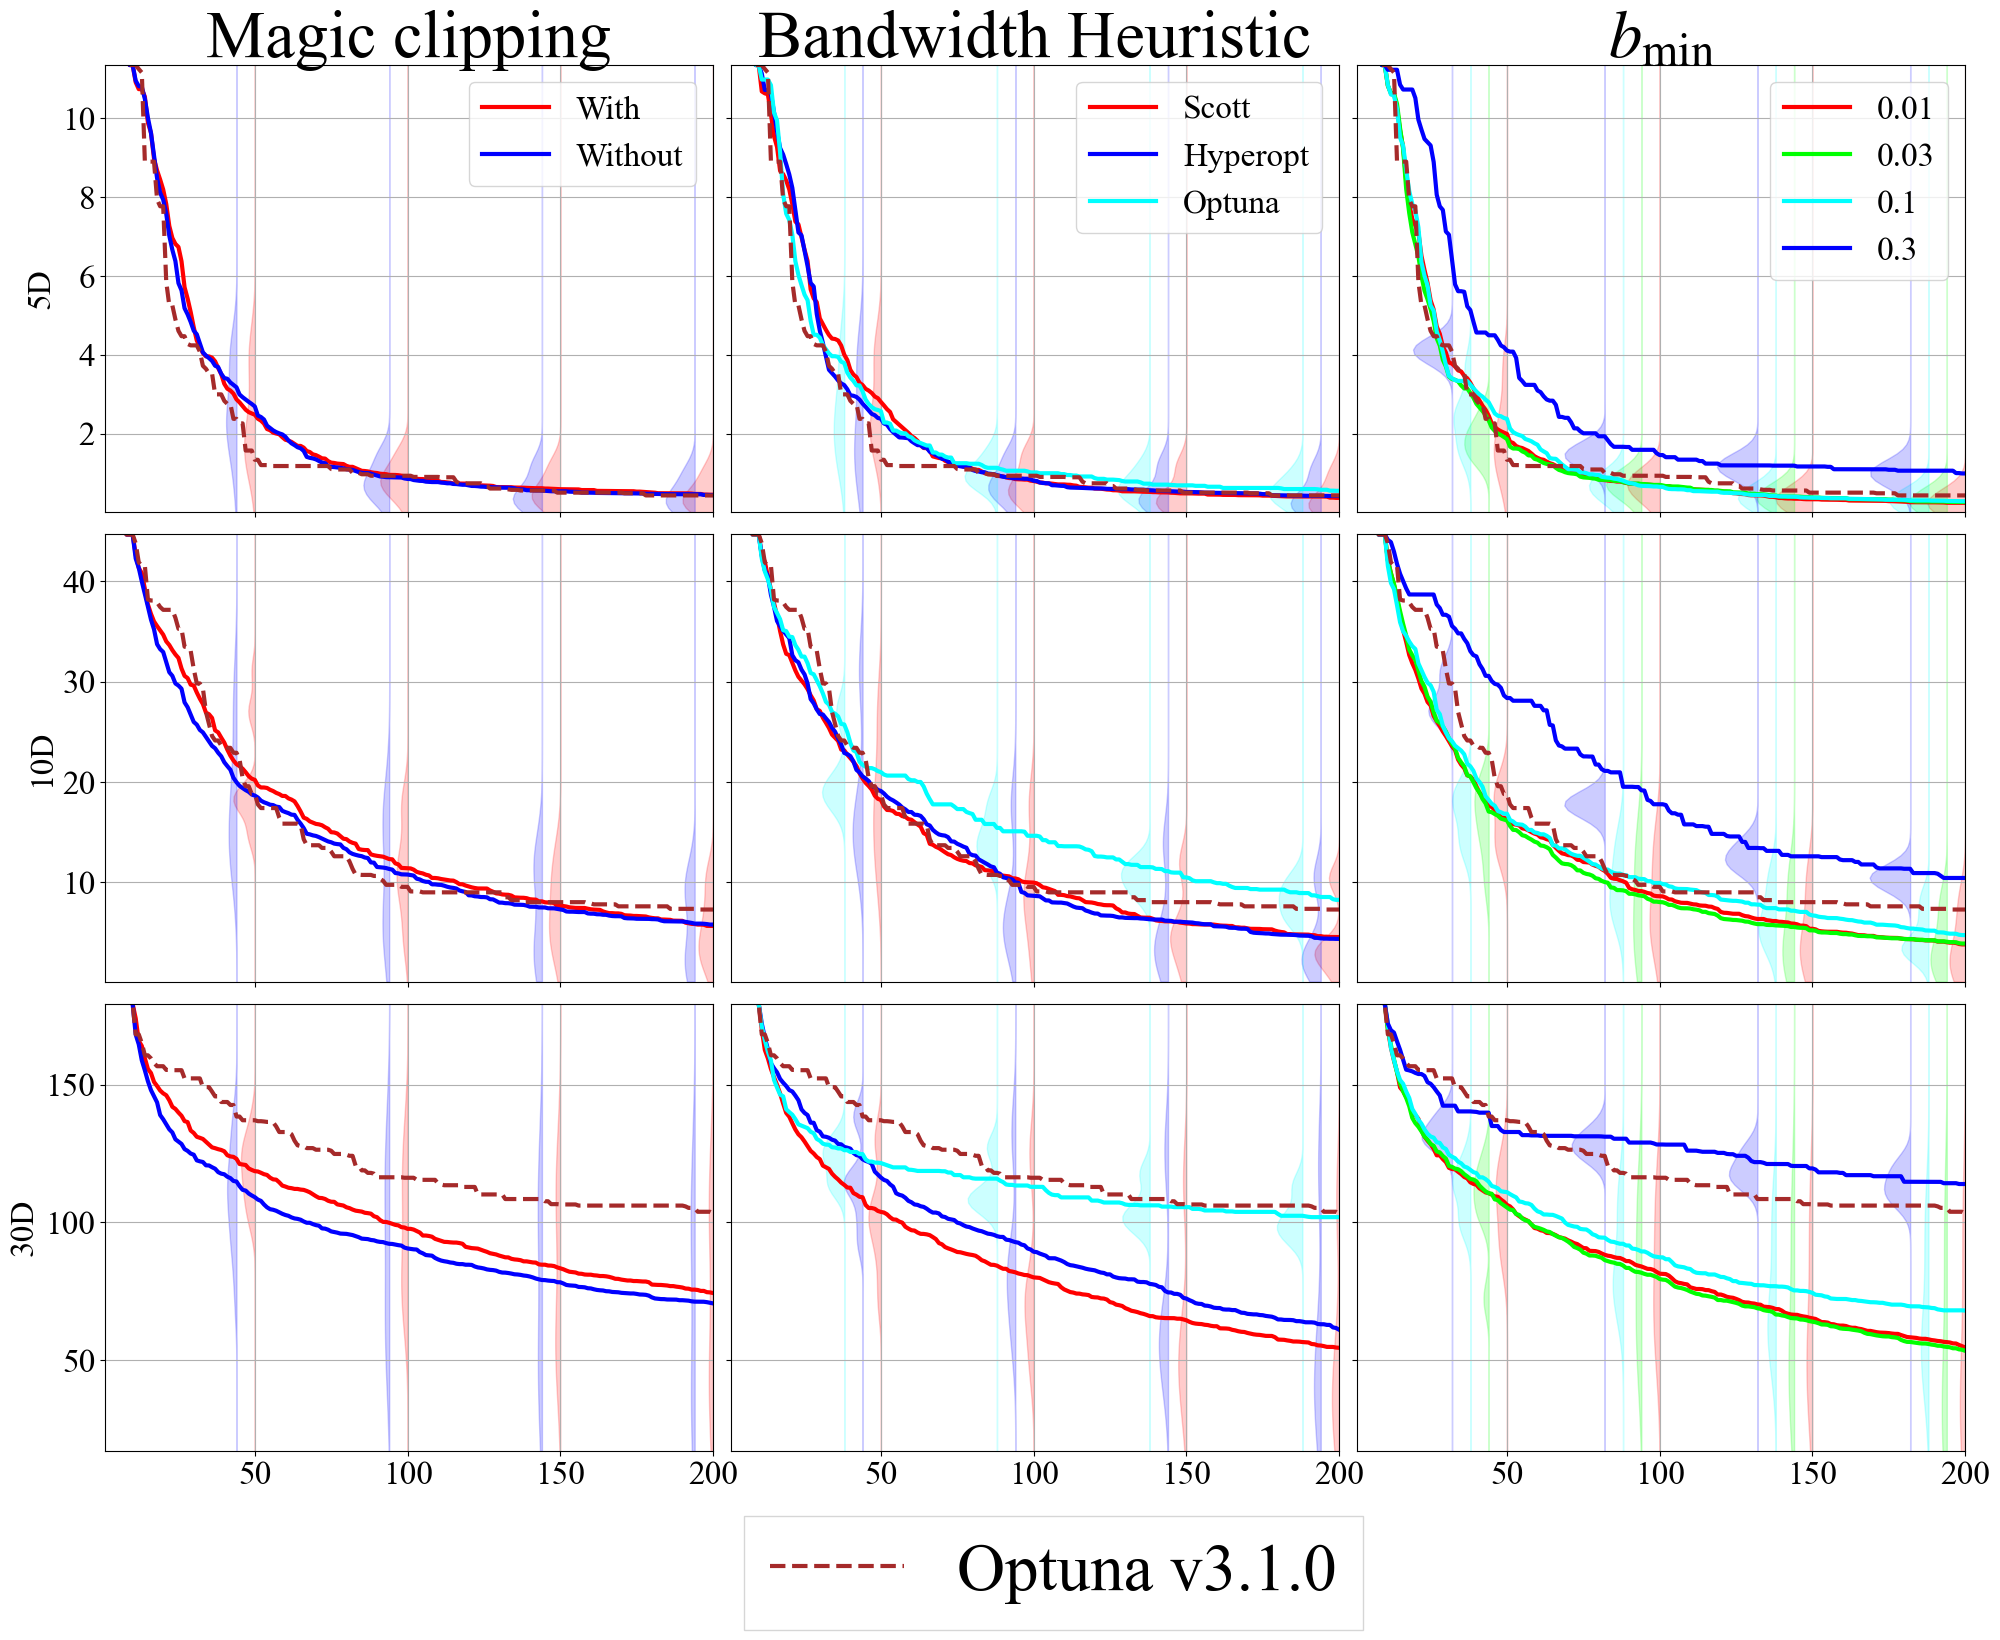

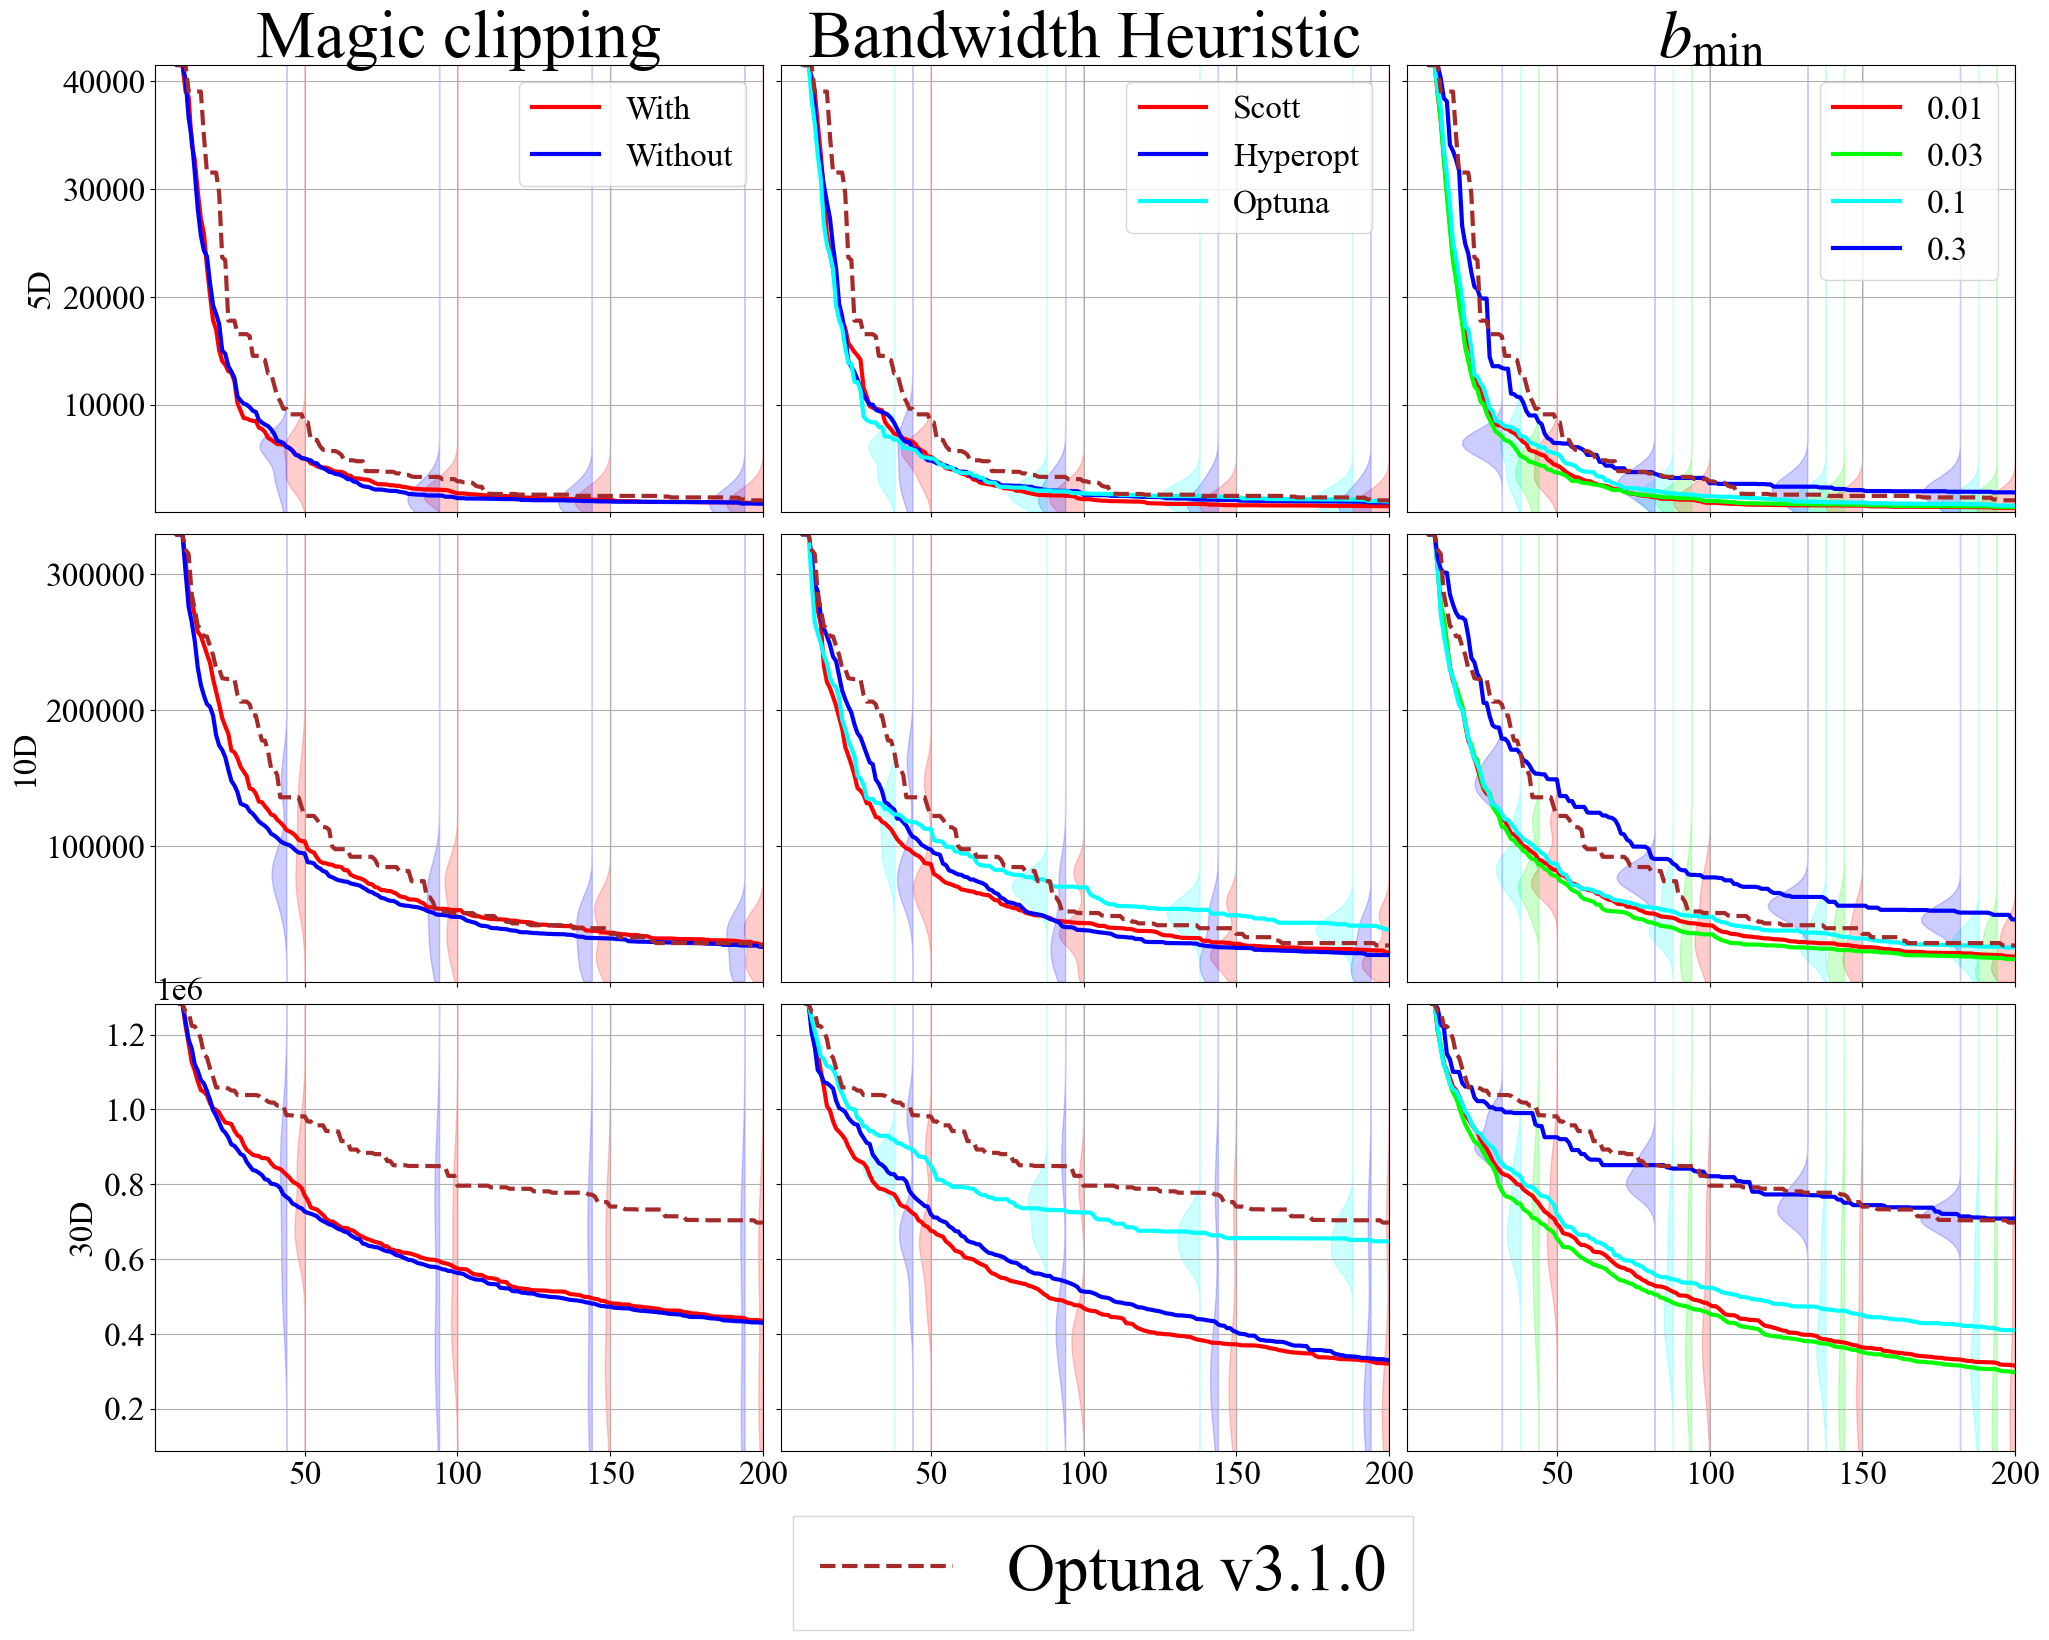

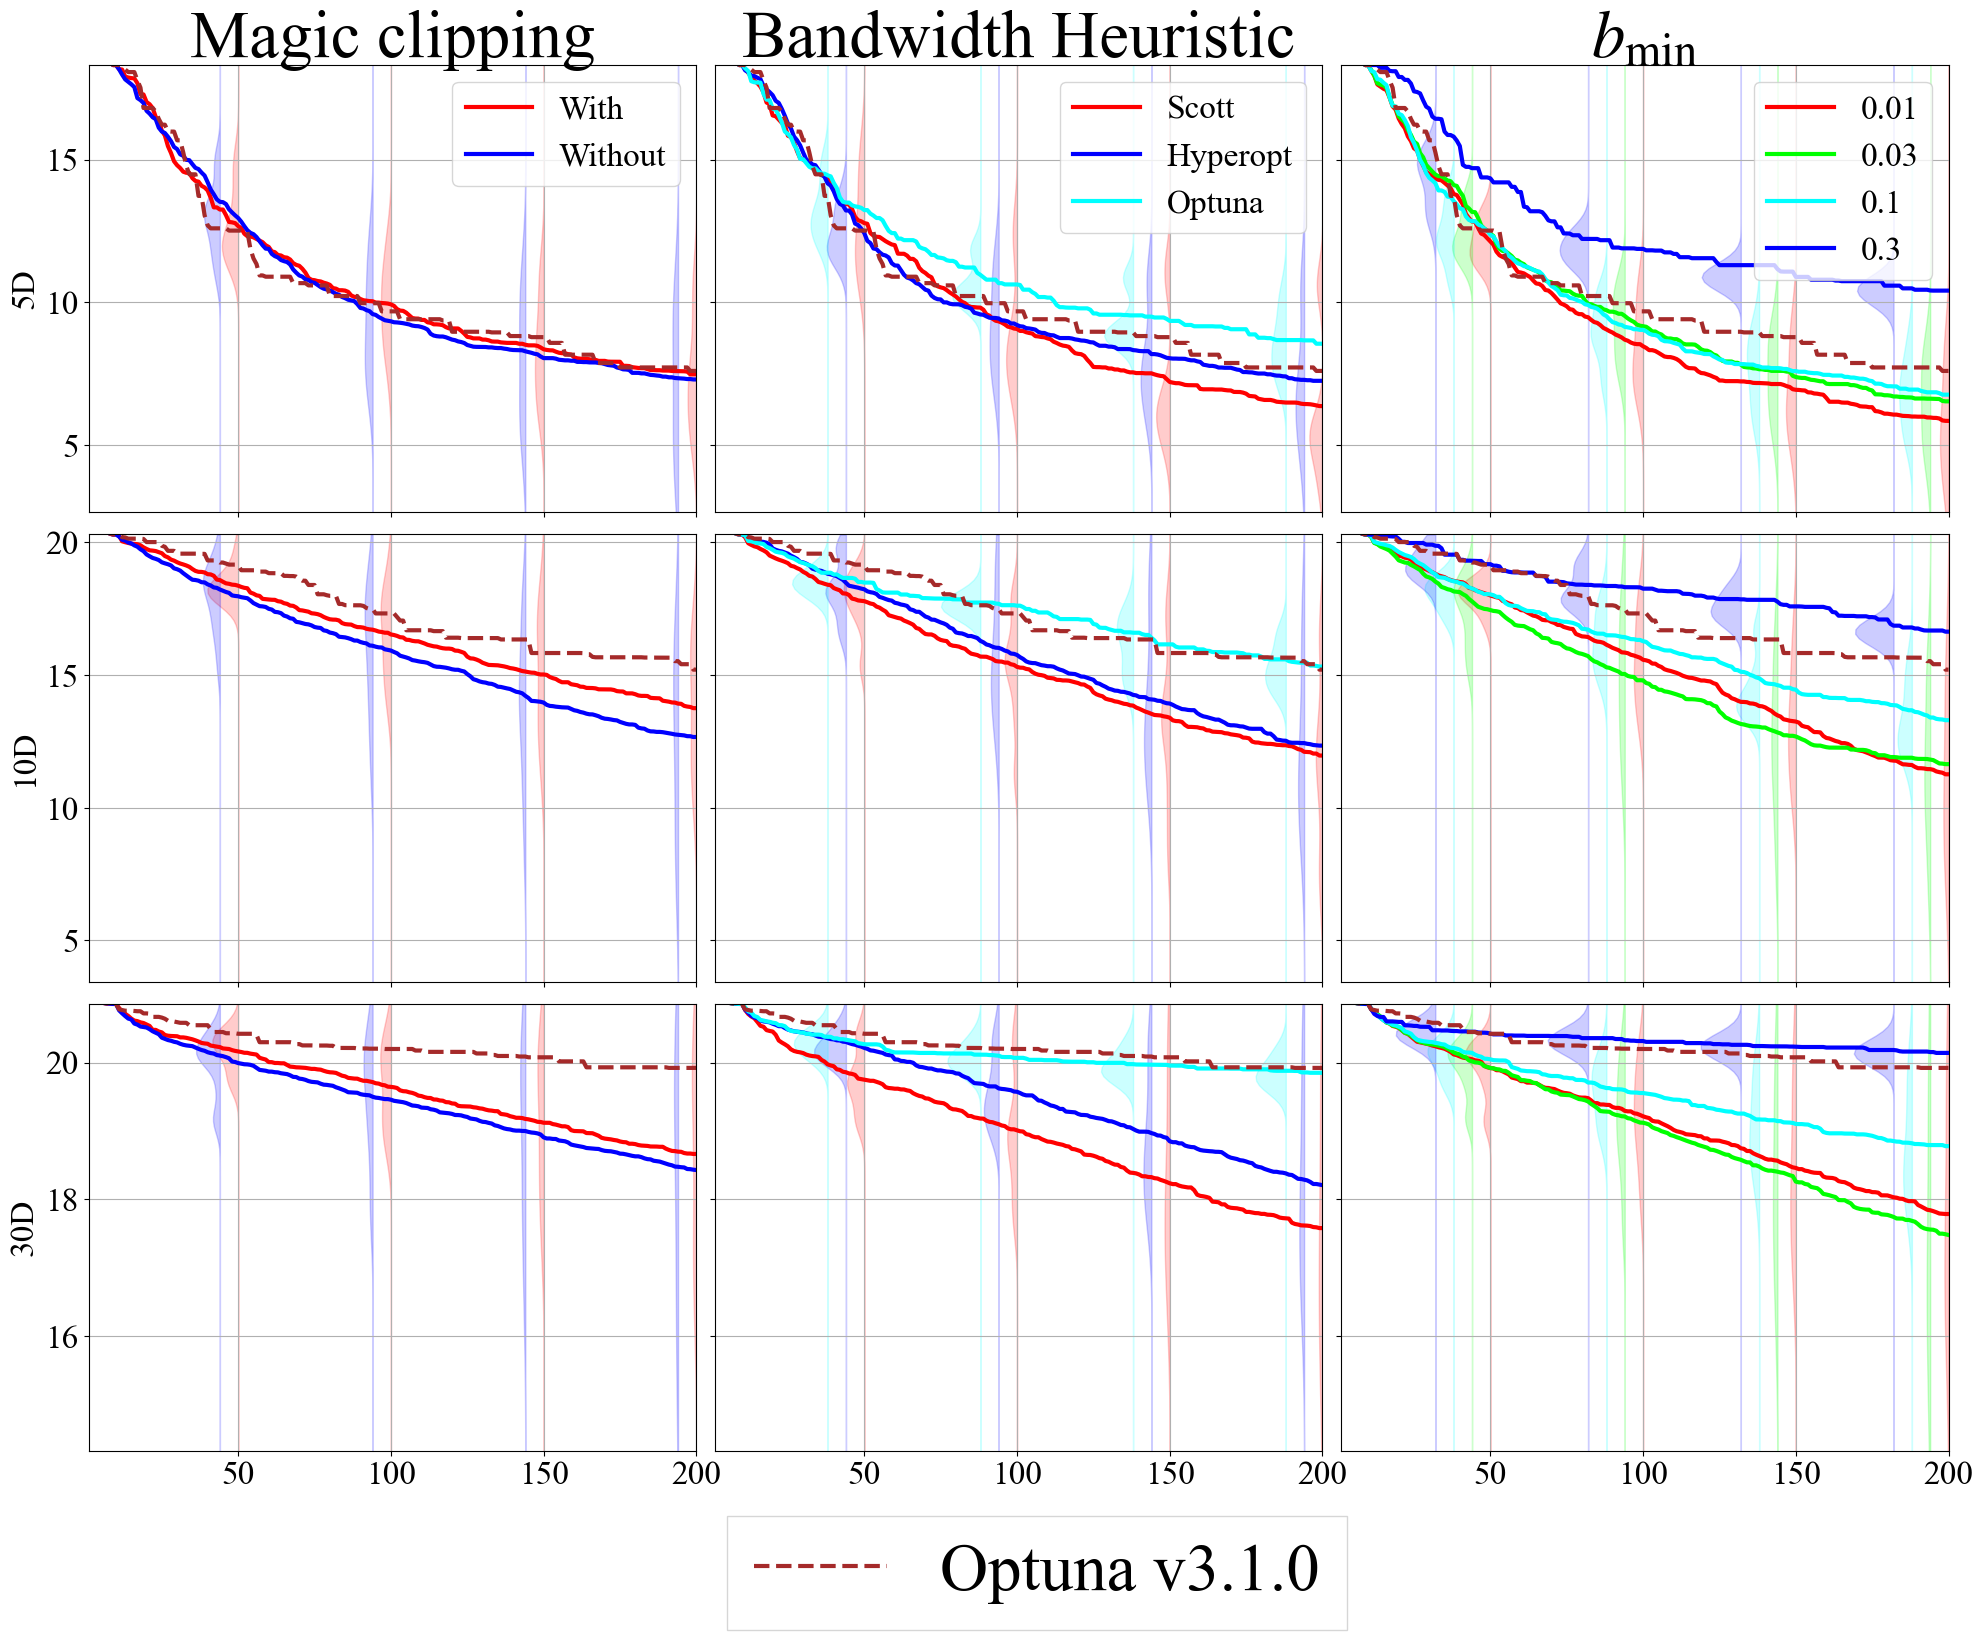

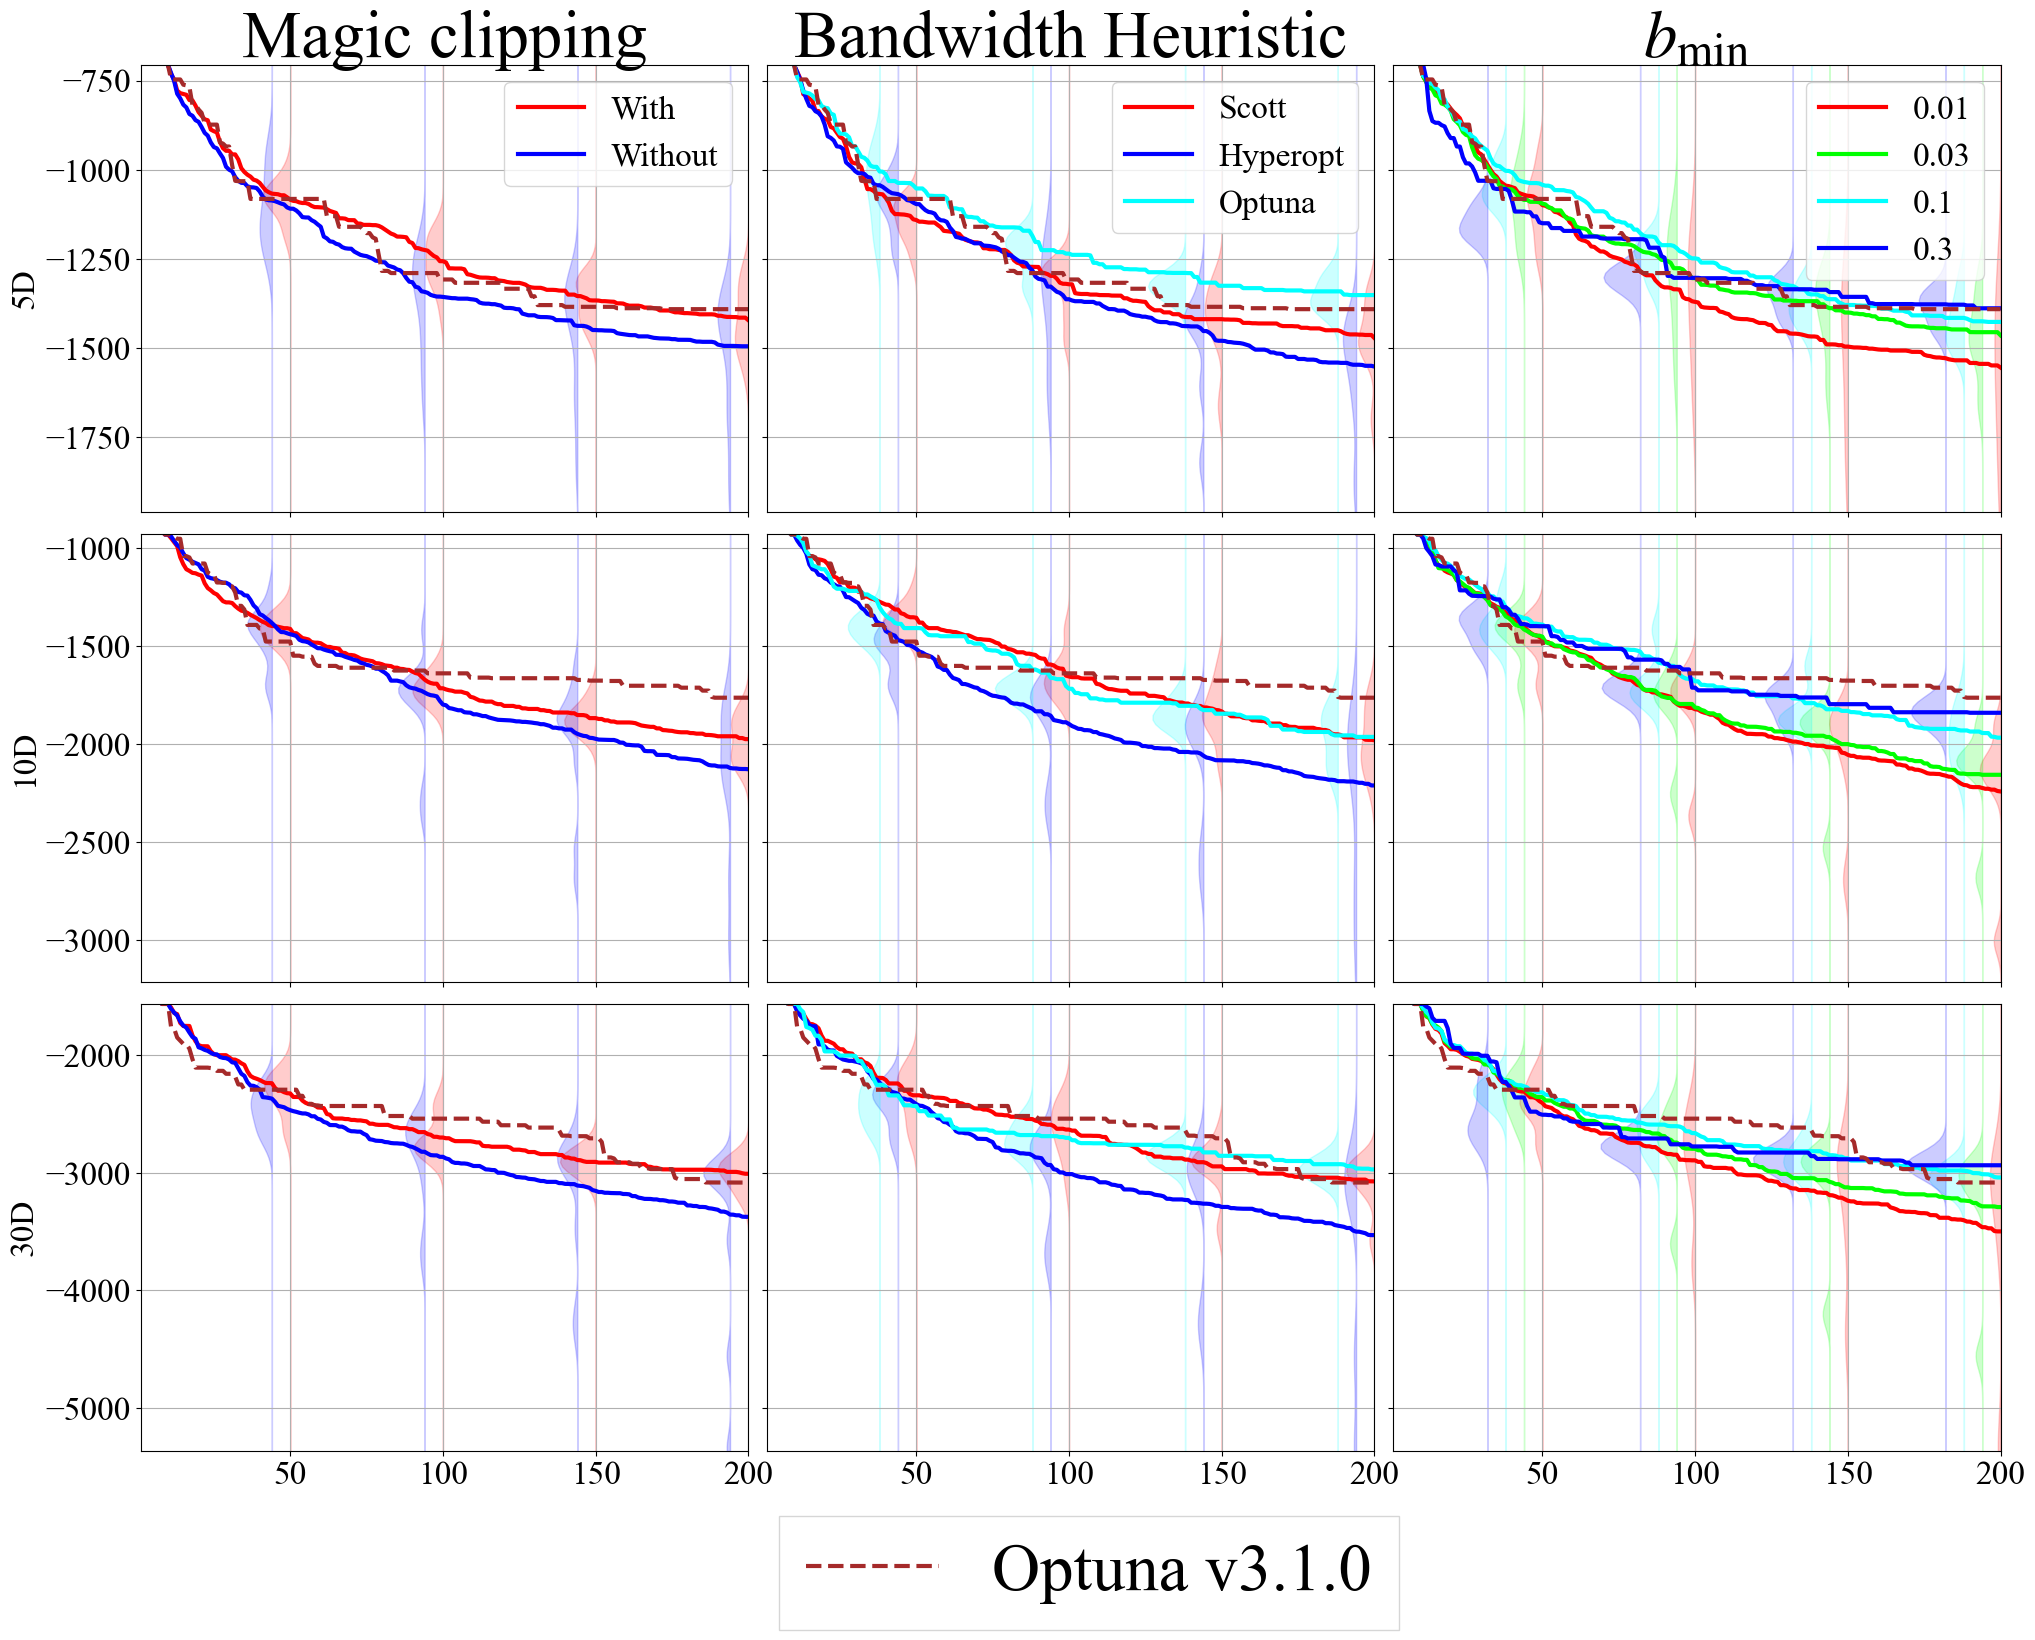

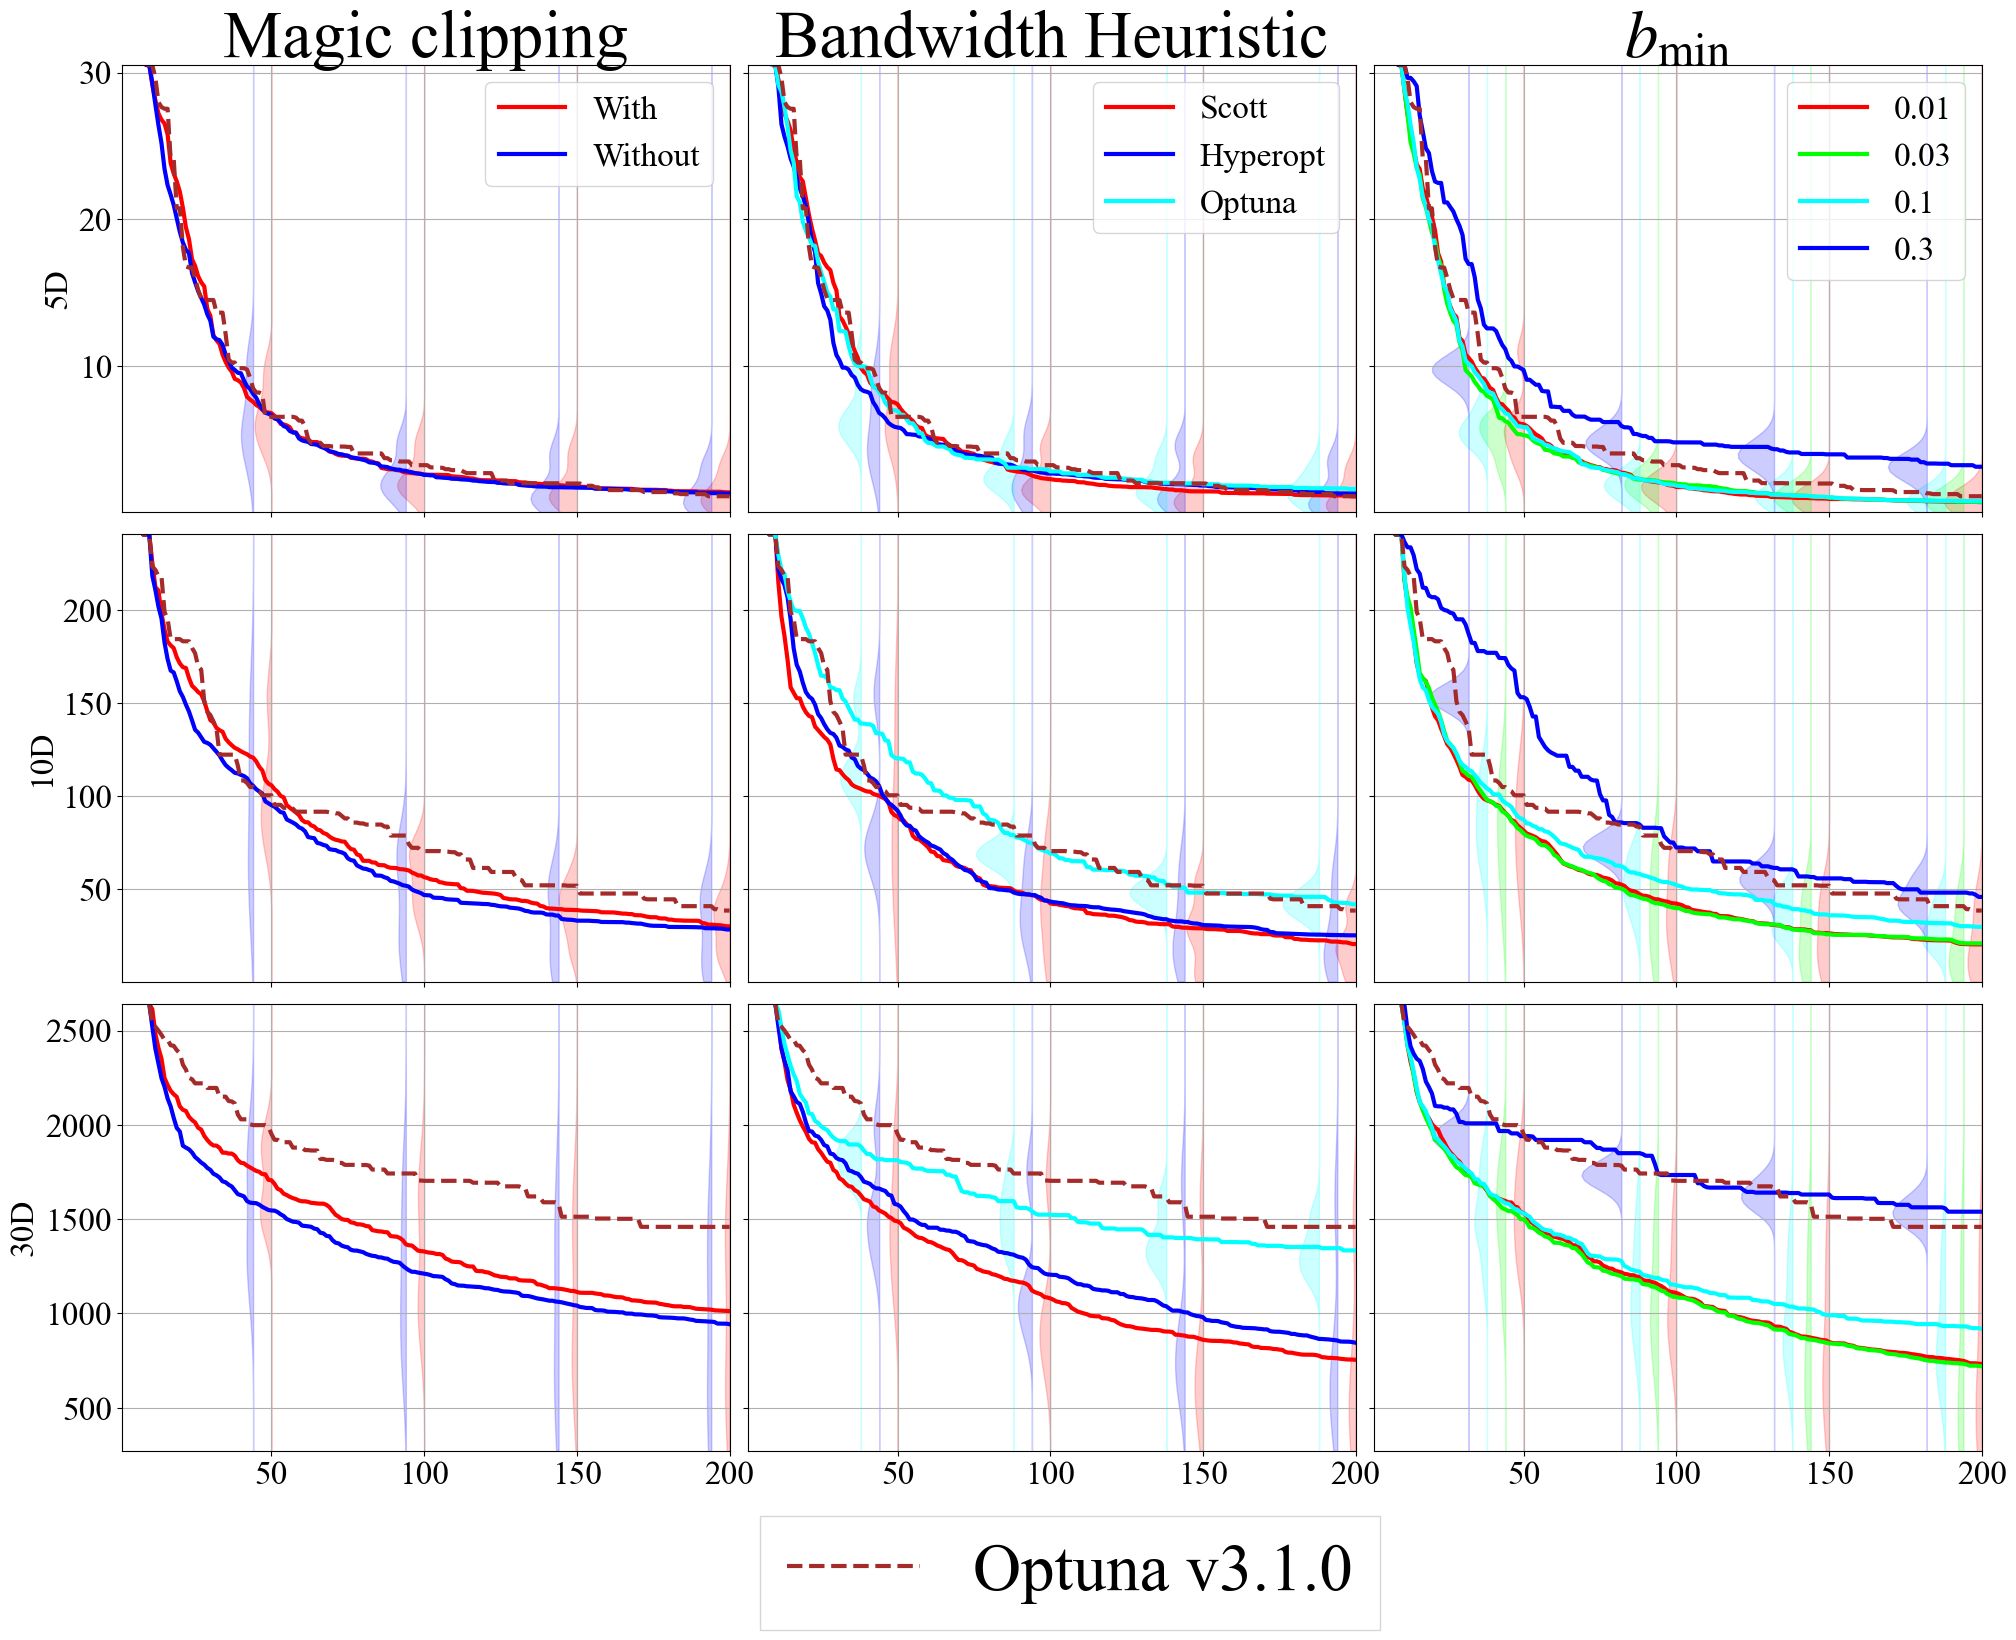

In [8]:
bench_names = list(set([name[:-4] for name in target_names if "30d" in name]))
BENCH_LABEL_DICT = {
    "Ackley": "Ackley",
    "Griewank": "Griewank",
    "KTablet": "K-Tablet",
    "Levy": "Levy",
    "Perm": "Perm",
    "Rastrigin": "Rastrigin",
    "Rosenbrock": "Rosenbrock",
    "Schwefel": "Schwefel",
    "Sphere": "Sphere",
    "Styblinski": "Styblinski",
    "WeightedSphere": "Weighted sphere",
    "XinSheYang": "Xin-She-Yang",
}
print(bench_names)

for bench_name in bench_names:
    title = BENCH_LABEL_DICT[bench_name.split("_")[0]]
    _, axes = plt.subplots(
        nrows=3,
        ncols=3,
        figsize=(24, 18),
        sharex=True,
        sharey="row",
        gridspec_kw=dict(
            wspace=0.03,
            hspace=0.05,
        )
    )
    plot_multiple_pdps(axes[0], target_name=f"{bench_name}_05d", set_title=True, set_label=True)
    axes[0][0].set_ylabel("5D")
    plot_multiple_pdps(axes[1], target_name=f"{bench_name}_10d", set_title=False, set_label=False)
    axes[1][0].set_ylabel("10D")
    plot_multiple_pdps(axes[2], target_name=f"{bench_name}_30d", set_title=False, set_label=False)
    axes[2][0].set_ylabel("30D")
    # plt.show()
    add_optuna_legend(ax=axes[-1][2], bbox_to_anchor=(-0.5, -0.07))
    # plt.suptitle(title, x=0.512, y=0.95, ha="center", fontsize=48)
    plt.savefig(f"figs/{bench_name}_bw.pdf", bbox_inches="tight")

## HPOBench

pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation


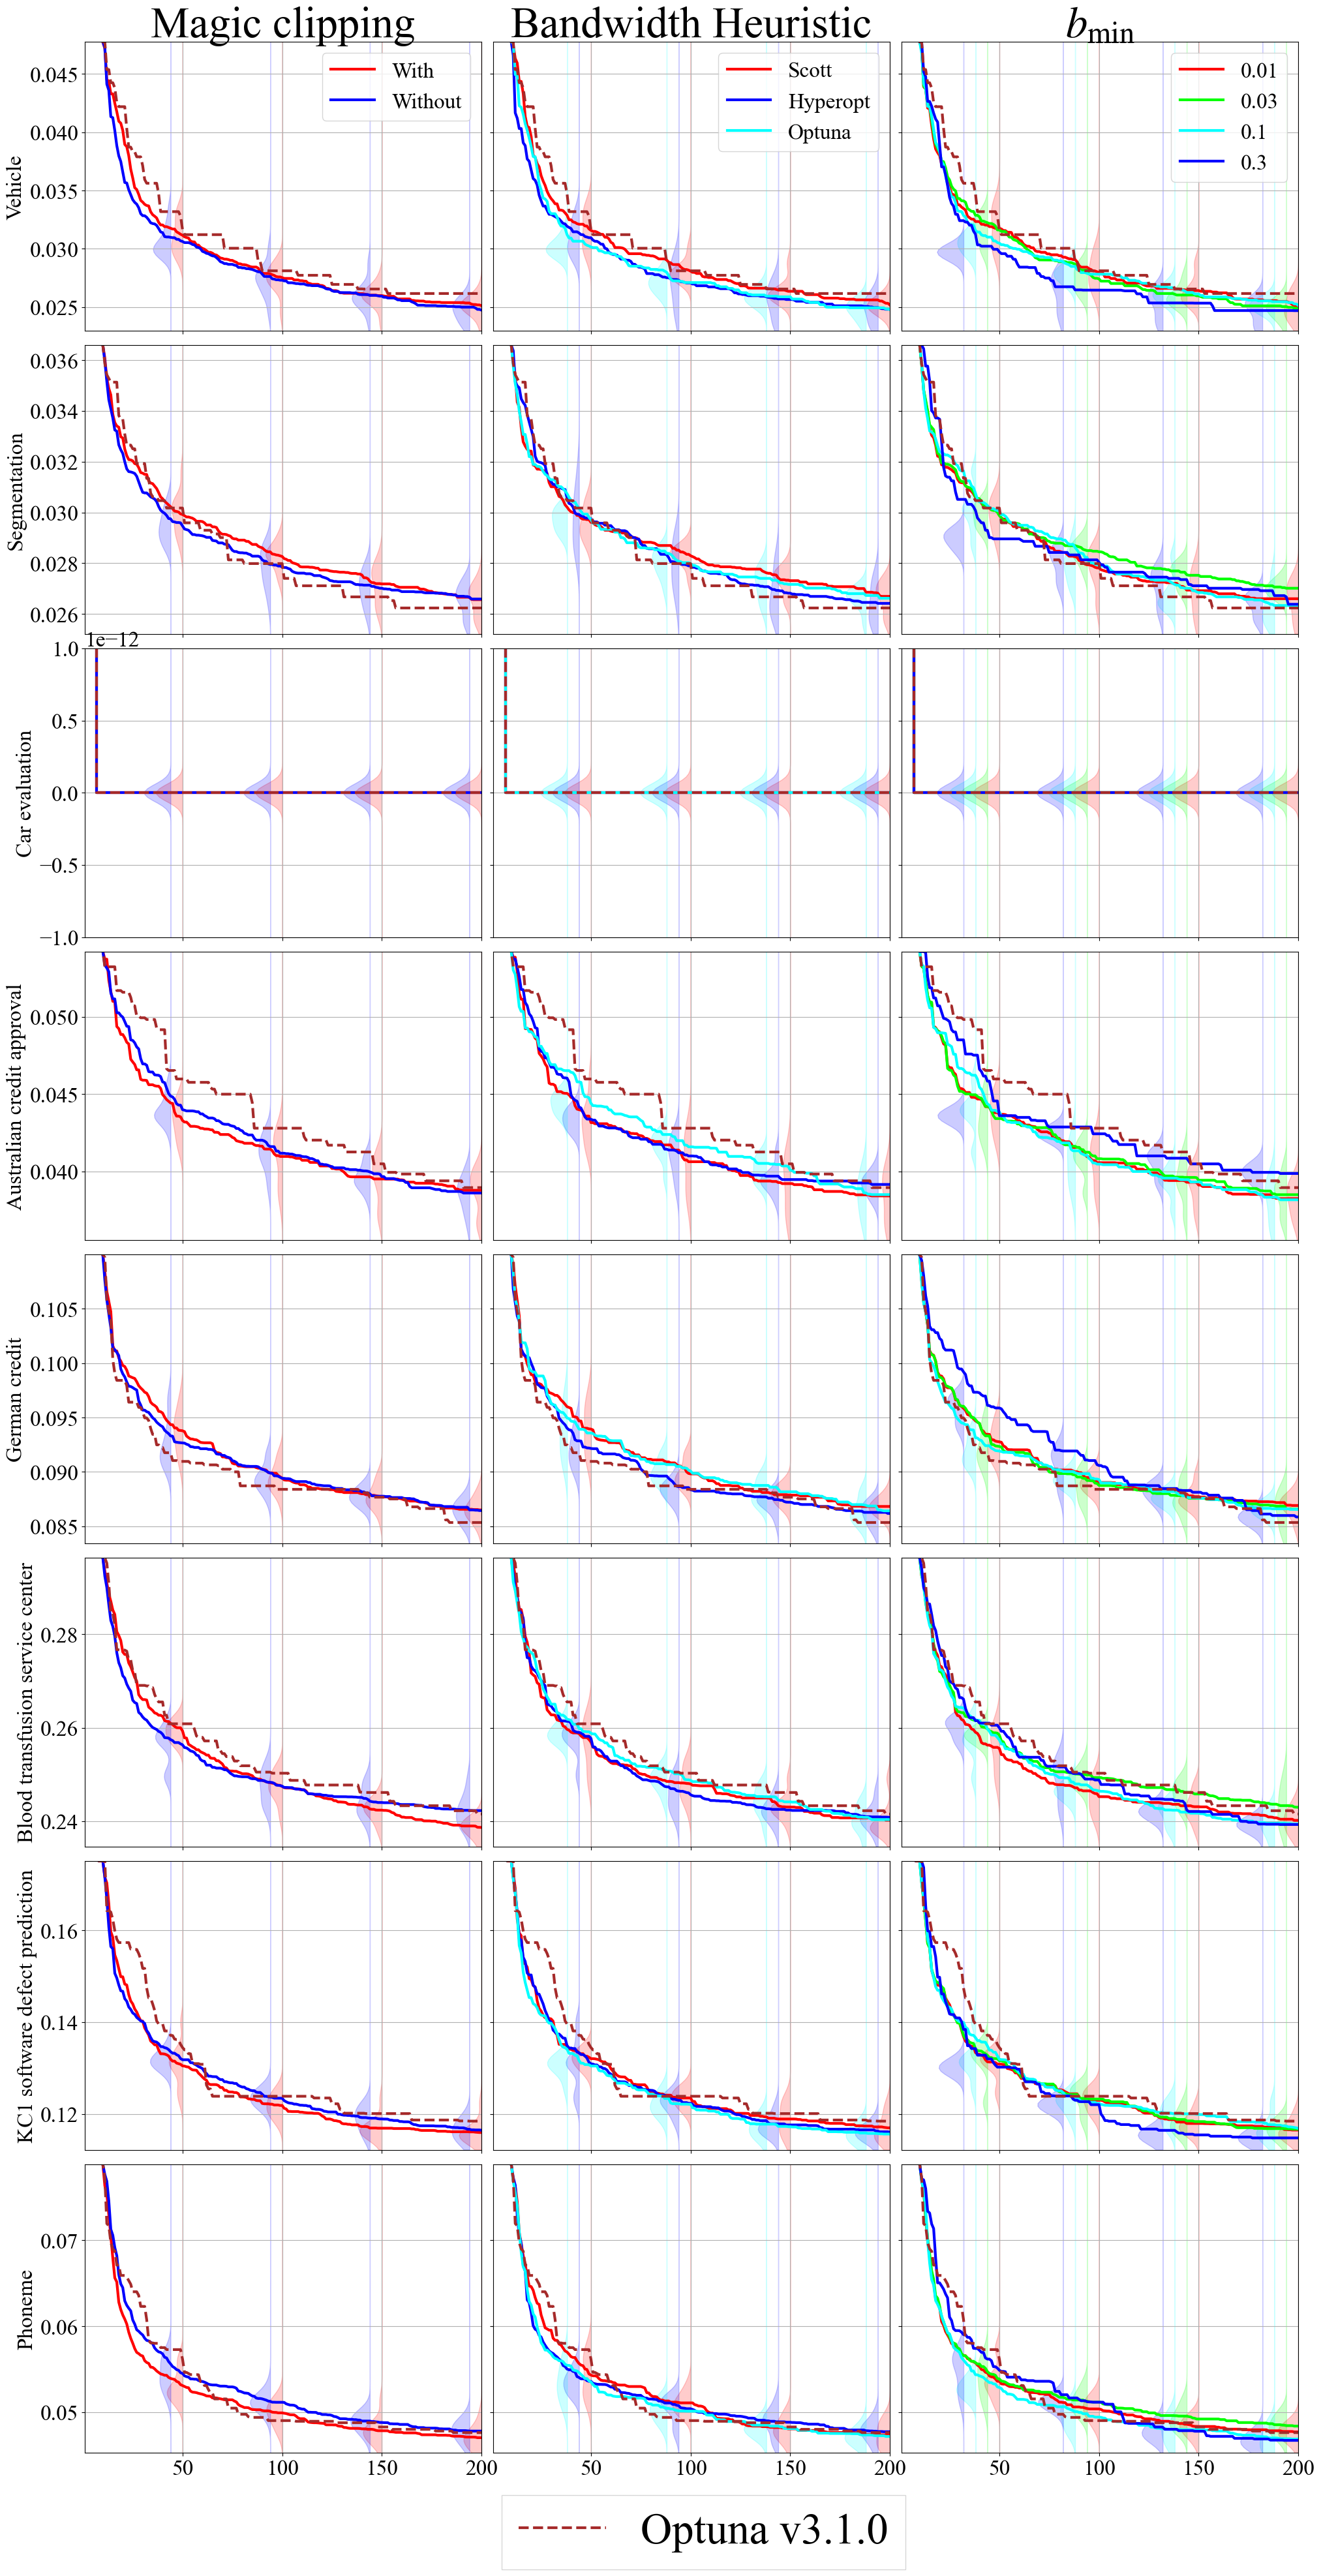

In [9]:
bench_names = [
    "vehicle",
    "segment",
    "car",
    "australian",
    "credit_g",
    "blood_transfusion",
    "kc1",
    "phoneme",
]
_, axes = plt.subplots(
    nrows=8,
    ncols=3,
    figsize=(24, 48),
    sharex=True,
    sharey="row",
    gridspec_kw=dict(
        wspace=0.03,
        hspace=0.05,
    )
)

label_dict = {
    "credit_g": "German credit",
    "vehicle": "Vehicle",
    "segment": "Segmentation",
    "car": "Car evaluation",
    "australian": "Australian credit approval",
    "blood_transfusion": "Blood transfusion service center",
    "kc1": "KC1 software defect prediction",
    "phoneme": "Phoneme",
}
set_title, set_label = True, True
for bench_name, ax in zip(bench_names, axes):
    ax[0].set_ylabel(label_dict[bench_name])
    plot_multiple_pdps(ax, target_name=bench_name, set_title=set_title, set_label=set_label)
    # plt.show()
    set_title, set_label = False, False

add_optuna_legend(ax=axes[-1][2], bbox_to_anchor=(-0.5, -0.07))
# plt.suptitle("HPOBench", x=0.512, y=0.905, fontsize=48)
plt.savefig(f"figs/hpobench_bw.pdf", bbox_inches="tight")

## HPOlib

pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation


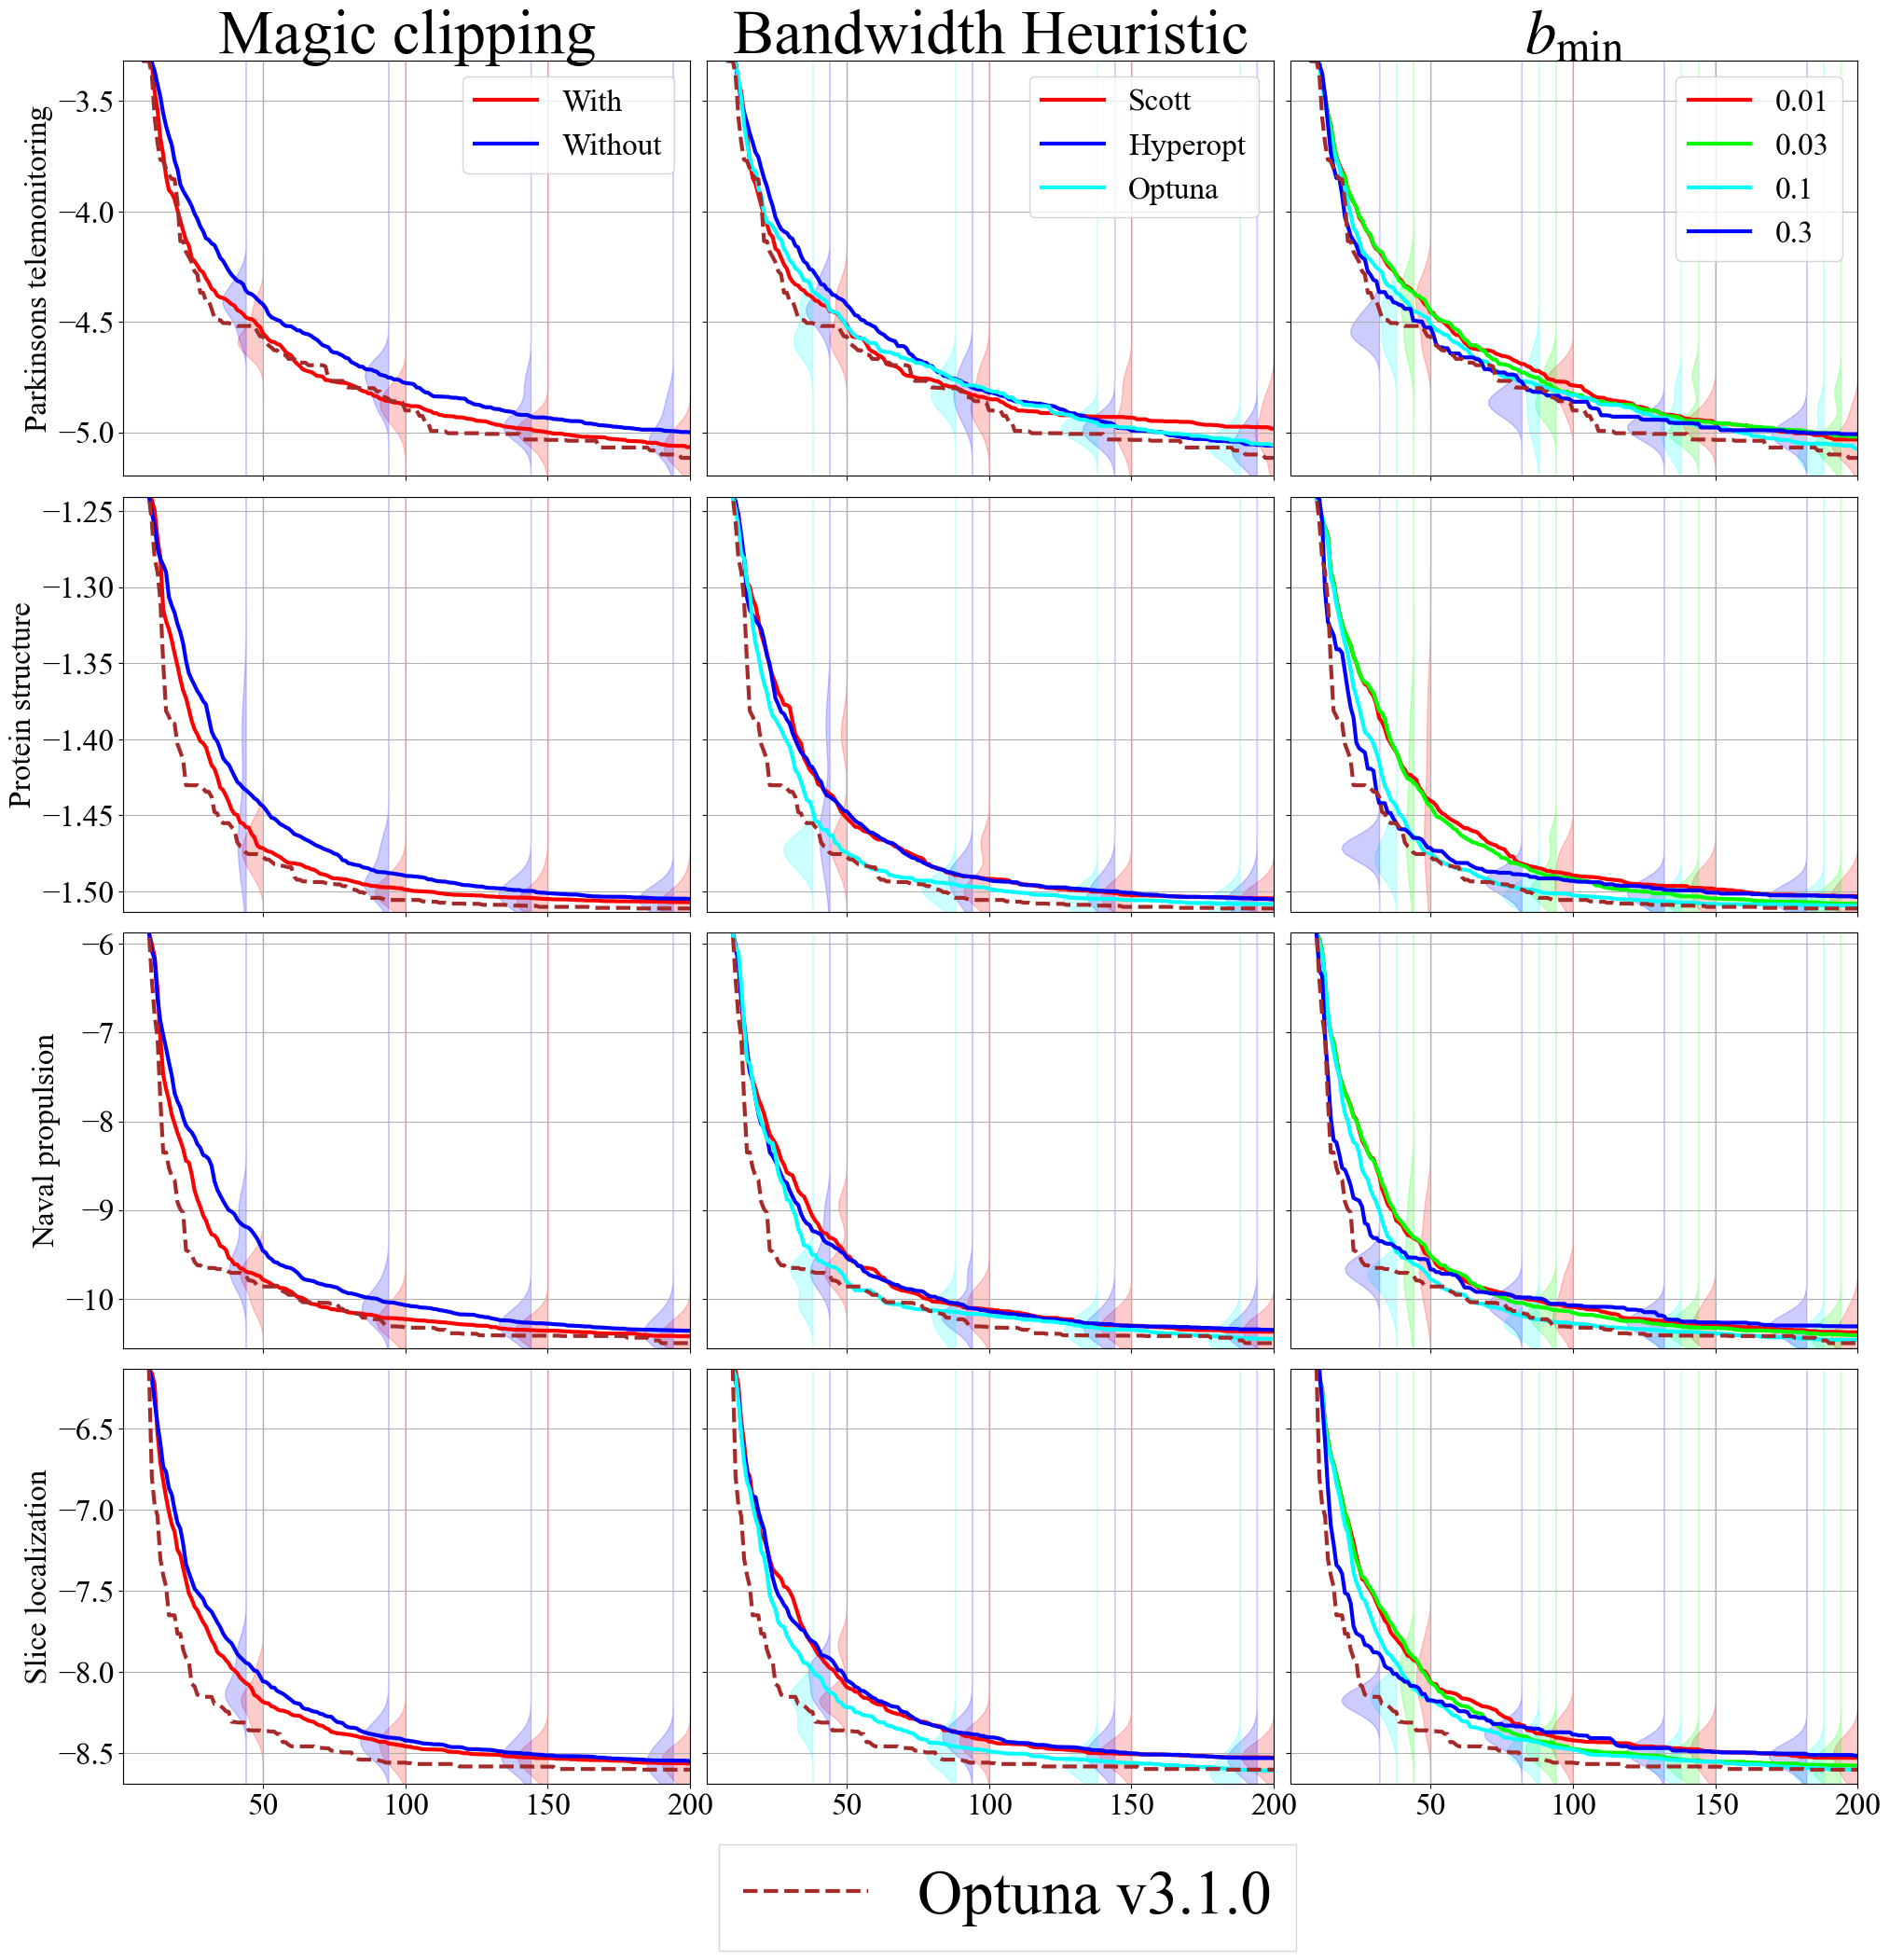

In [10]:
bench_names = ["parkinsons_telemonitoring", "protein_structure", "naval_propulsion", "slice_localization"]
_, axes = plt.subplots(
    nrows=4,
    ncols=3,
    figsize=(24, 24),
    sharex=True,
    sharey="row",
    gridspec_kw=dict(
        wspace=0.03,
        hspace=0.05,
    )
)

set_title, set_label = True, True
label_dict = {
    "parkinsons_telemonitoring": "Parkinsons telemonitoring",
    "naval_propulsion": "Naval propulsion",
    "slice_localization": "Slice localization",
    "protein_structure": "Protein structure"
}
for bench_name, ax in zip(bench_names, axes):
    ax[0].set_ylabel(label_dict[bench_name])
    plot_multiple_pdps(ax, target_name=bench_name, set_title=set_title, set_label=set_label)
    # plt.show()
    set_title, set_label = False, False

add_optuna_legend(ax=axes[-1][2], bbox_to_anchor=(-0.5, -0.07))
# plt.suptitle("HPOlib", x=0.515, y=0.93, fontsize=48)
plt.savefig(f"figs/hpolib_bw.pdf", bbox_inches="tight")

## JAHS-Bench-201

pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation
pass recommendation


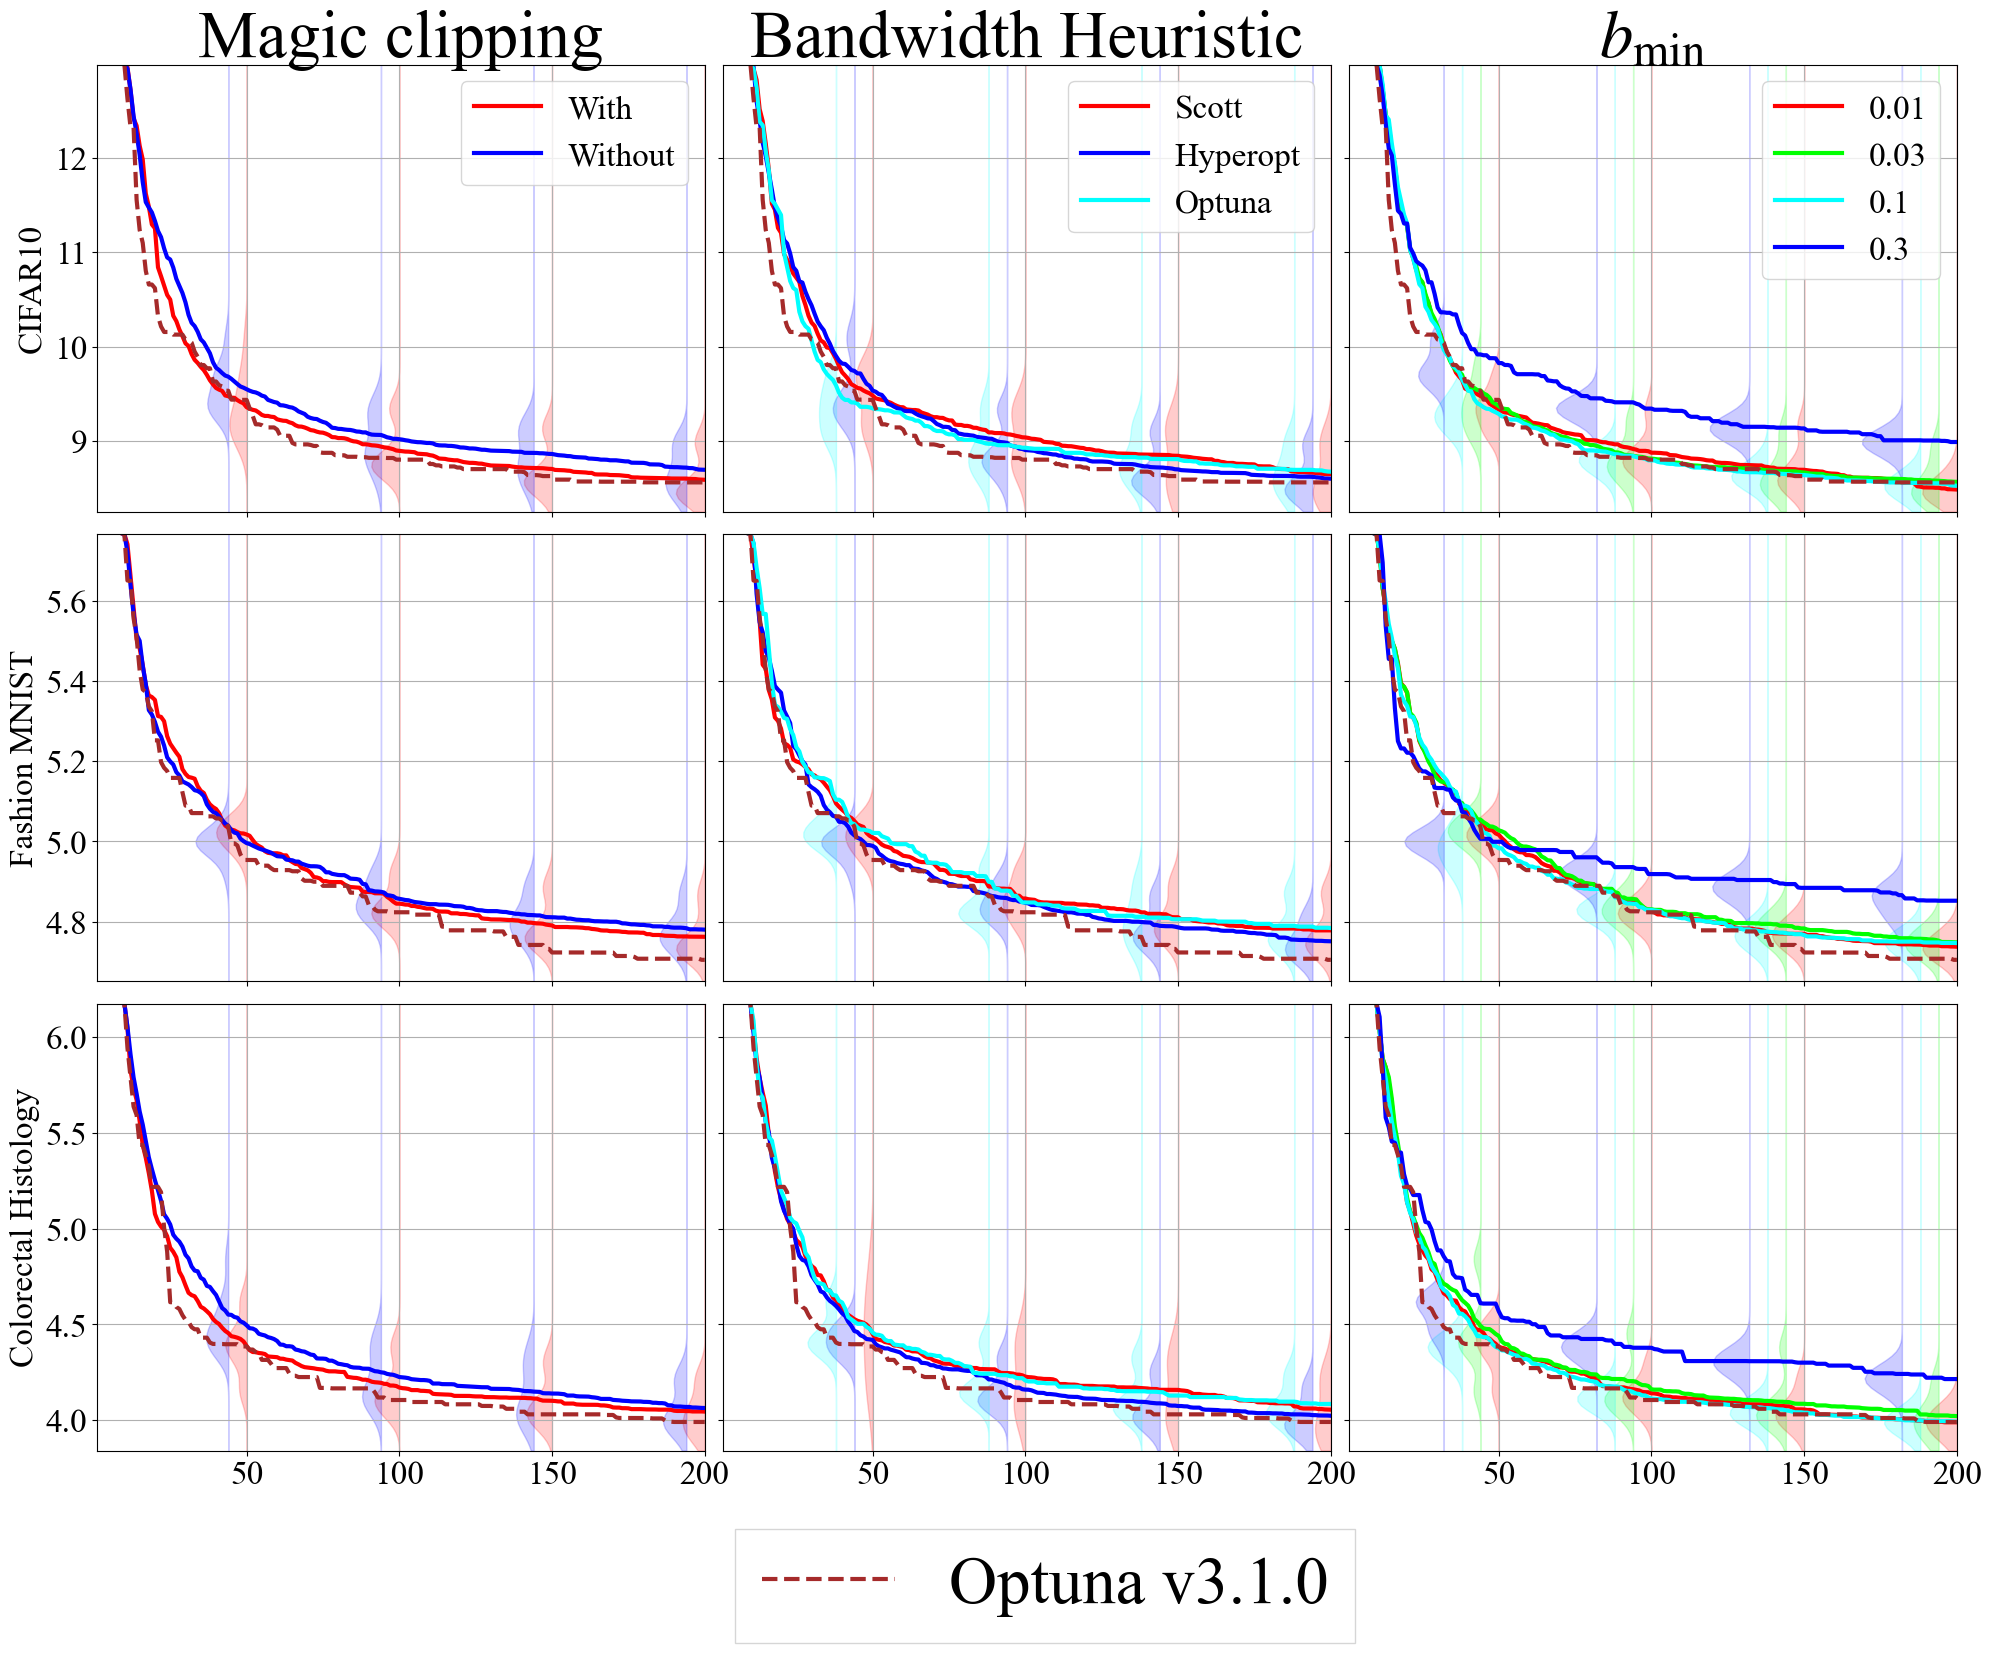

In [11]:
bench_names = ["cifar10", "fashion_mnist", "colorectal_histology"]
_, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(24, 18),
    sharex=True,
    sharey="row",
    gridspec_kw=dict(
        wspace=0.03,
        hspace=0.05,
    )
)

set_title, set_label = True, True
label_dict = {
    "cifar10": "CIFAR10",
    "fashion_mnist": "Fashion MNIST",
    "colorectal_histology": "Colorectal Histology"
}
for bench_name, ax in zip(bench_names, axes):
    ax[0].set_ylabel(label_dict[bench_name])
    plot_multiple_pdps(ax, target_name=bench_name, set_title=set_title, set_label=set_label)
    # plt.show()
    set_title, set_label = False, False

add_optuna_legend(ax=axes[-1][2], bbox_to_anchor=(-0.5, -0.1))
# plt.suptitle("JAHS-Bench-201", x=0.513, y=0.95, fontsize=48)
plt.savefig(f"figs/jahs_bw.pdf", bbox_inches="tight")